In [1]:
#Credit Card Segmentation Project

In [2]:
#Importing the required Modules
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import Imputer
from scipy.stats import pearsonr
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
import time
%matplotlib inline

In [5]:
#Importing data
data=pd.read_csv("C:\\Data_Science\\Certifications\\AnalytixLabs\\Python\\Final Projects\\Project_Solutions_Git_Original\\CreditCardSegmentationProject-master\\data.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
#KPIs
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [12]:
#Determining number of null values
data.isnull().sum().sort_values(ascending=False)

CREDIT_LIMIT                        1
TENURE                              0
PURCHASES_FREQUENCY                 0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
ONEOFF_PURCHASES_FREQUENCY          0
PRC_FULL_PAYMENT                    0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
CUST_ID                             0
dtype: int64

In [11]:
 #Replacing missing values with Median values
imputer_mean = Imputer(missing_values = 'NaN', strategy='median')
imputer_mean.fit(data[['MINIMUM_PAYMENTS']])
data['MINIMUM_PAYMENTS'] = imputer_mean.transform(data[['MINIMUM_PAYMENTS']])

In [13]:
#Dropping an empty value
data.drop(5203,axis=0,inplace=True)

In [14]:
data.isnull().sum().sort_values(ascending=False)

TENURE                              0
PRC_FULL_PAYMENT                    0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
CUST_ID                             0
dtype: int64

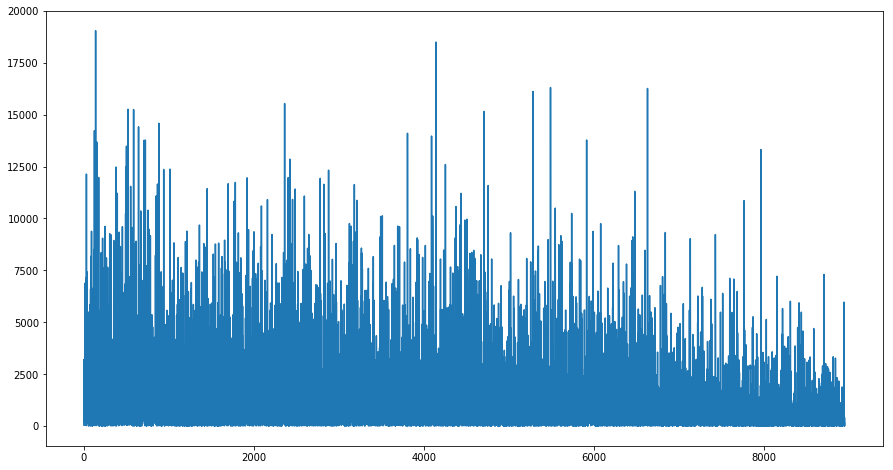

In [15]:
data['BALANCE'].plot(figsize=(15,8))

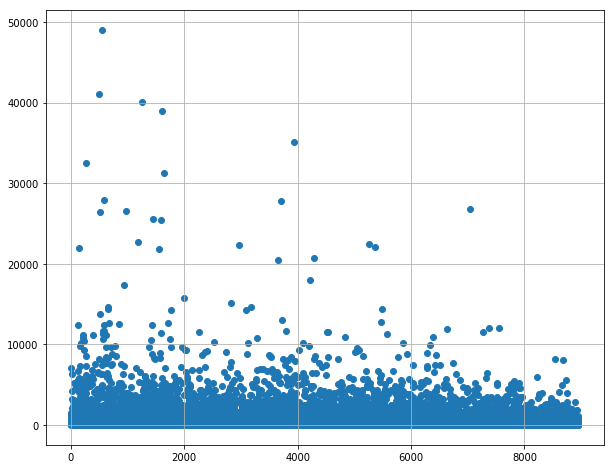

In [16]:
plt.subplots(figsize=(10,8))
plt.scatter(data.index,data['PURCHASES'])
plt.grid()

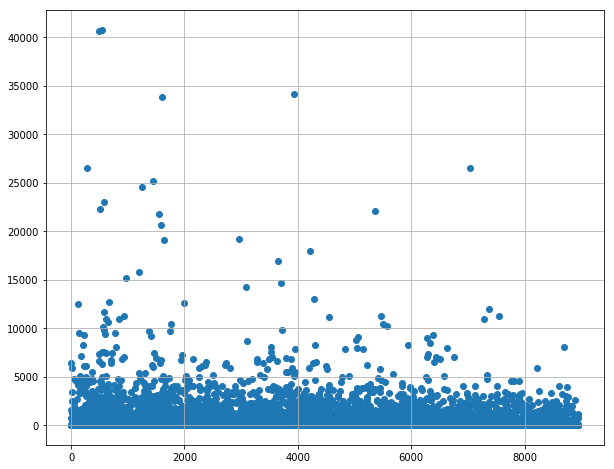

In [17]:
plt.subplots(figsize=(10,8))
plt.scatter(data.index,data['ONEOFF_PURCHASES'])
plt.grid()

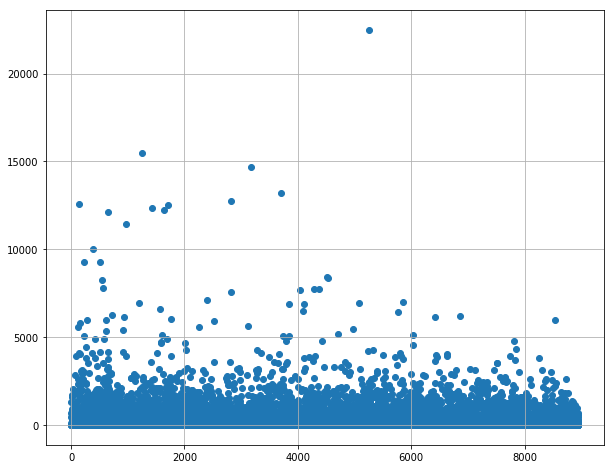

In [18]:
plt.subplots(figsize=(10,8))
plt.scatter(data.index,data['INSTALLMENTS_PURCHASES'])
plt.grid()

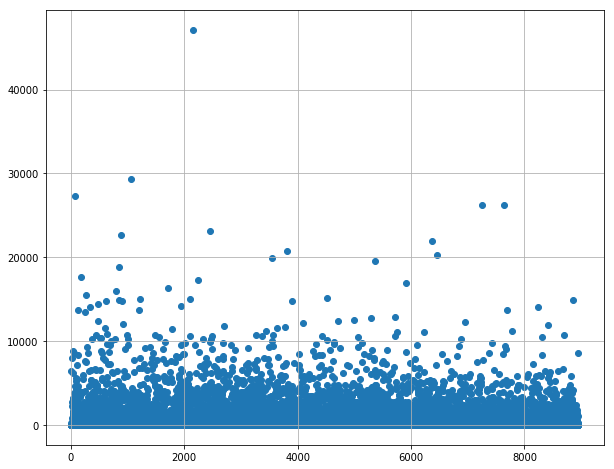

In [19]:
plt.subplots(figsize=(10,8))
plt.scatter(data.index,data['CASH_ADVANCE'])
plt.grid()

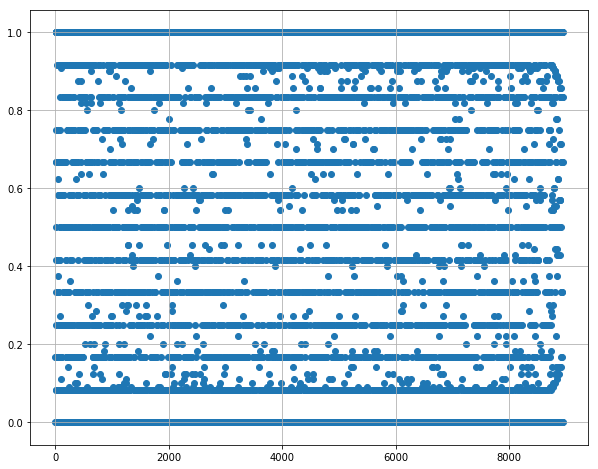

In [20]:
plt.subplots(figsize=(10,8))
plt.scatter(data.index,data['PURCHASES_FREQUENCY'])
plt.grid()

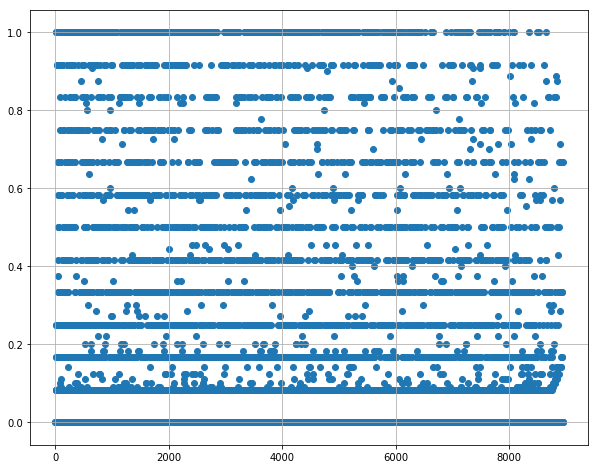

In [21]:
plt.subplots(figsize=(10,8))
plt.scatter(data.index,data['ONEOFF_PURCHASES_FREQUENCY'])
plt.grid()

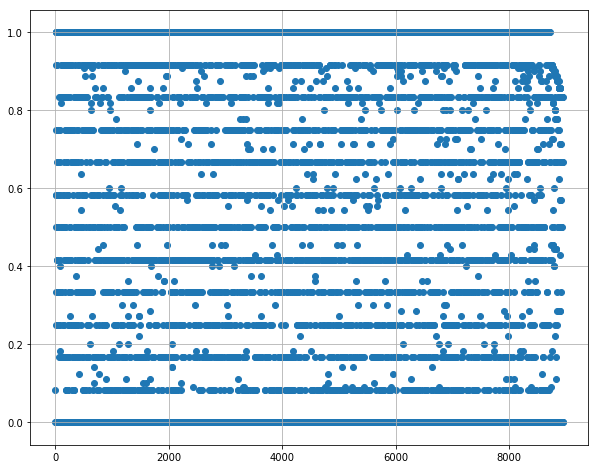

In [22]:
plt.subplots(figsize=(10,8))
plt.scatter(data.index,data['PURCHASES_INSTALLMENTS_FREQUENCY'])
plt.grid()

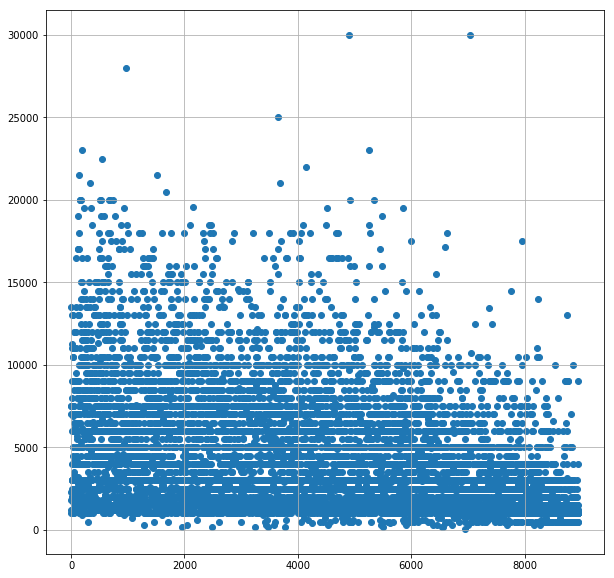

In [23]:
plt.subplots(figsize=(10,10))
plt.scatter(data.index,data['CREDIT_LIMIT'])
plt.grid()

In [24]:
print(pearsonr(data['PURCHASES'],data['INSTALLMENTS_PURCHASES']))

(0.6798885937366909, 0.0)


In [25]:
print(pearsonr(data['PURCHASES'],data['BALANCE']))

(0.18122958823397178, 6.093161599945184e-67)


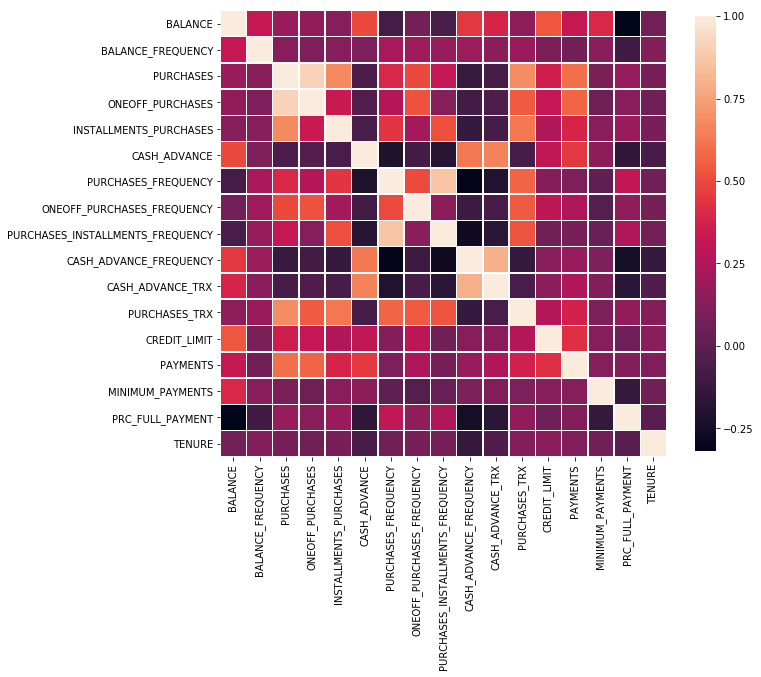

In [26]:
# Create a correlation matrix

corr = data.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, square=True, linewidths=.5, cbar_kws={"shrink": .8}, ax=ax)
plt.show()

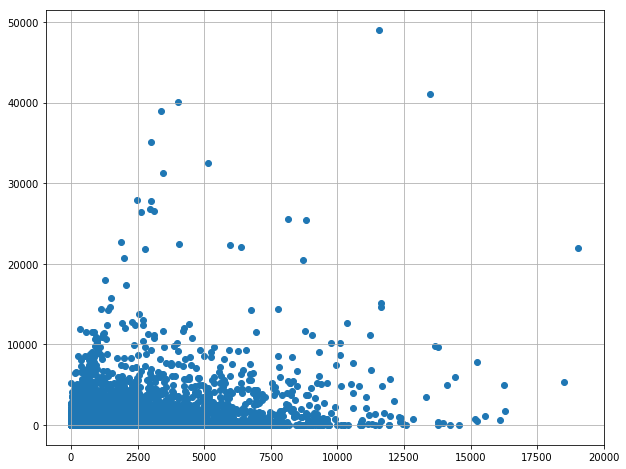

In [27]:
plt.subplots(figsize=(10,8))
plt.scatter(data['BALANCE'],data['PURCHASES'])
plt.grid()

C:\Users\SESA475934\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\SESA475934\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


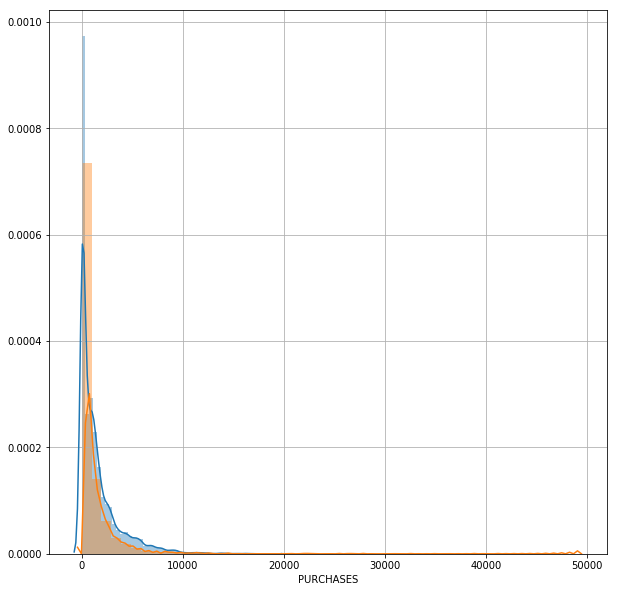

In [29]:
plt.subplots(figsize=(10,10))
sns.distplot(data['BALANCE'])
sns.distplot(data['PURCHASES'])
plt.grid()

C:\Users\SESA475934\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\SESA475934\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


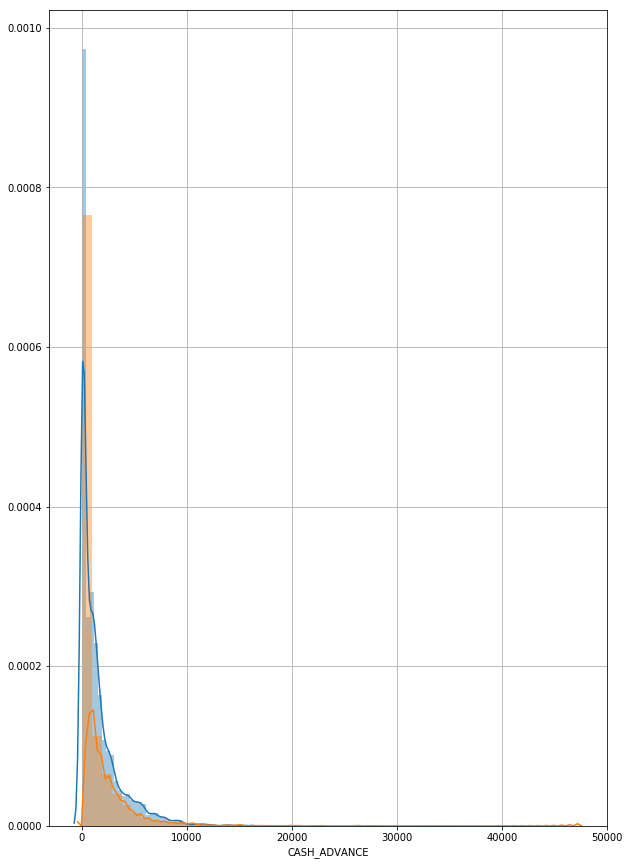

In [31]:
plt.subplots(figsize=(10,15))
sns.distplot(data['BALANCE'])
sns.distplot(data['CASH_ADVANCE'])
plt.grid()

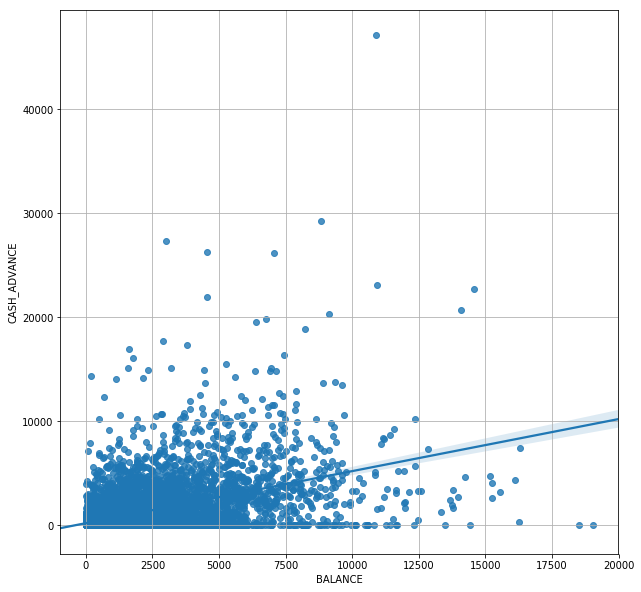

In [35]:
plt.subplots(figsize=(10,10))
sns.regplot(data['BALANCE'],data['CASH_ADVANCE'])
plt.grid()

C:\Users\SESA475934\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\SESA475934\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


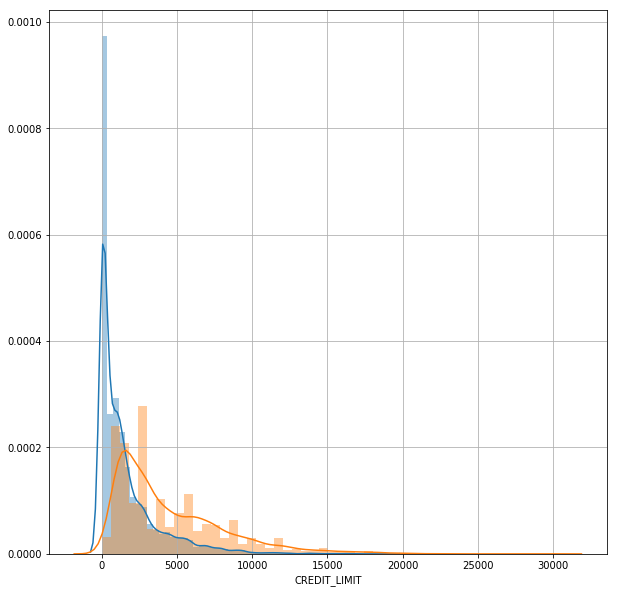

In [32]:
plt.subplots(figsize=(10,10))
sns.distplot(data['BALANCE'])
sns.distplot(data['CREDIT_LIMIT'])
plt.grid()

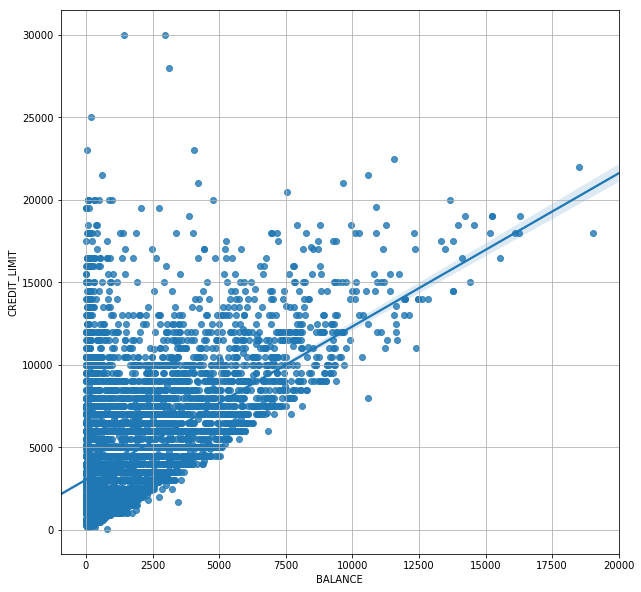

In [33]:
plt.subplots(figsize=(10,10))
sns.regplot(data['BALANCE'],data['CREDIT_LIMIT'])
plt.grid()

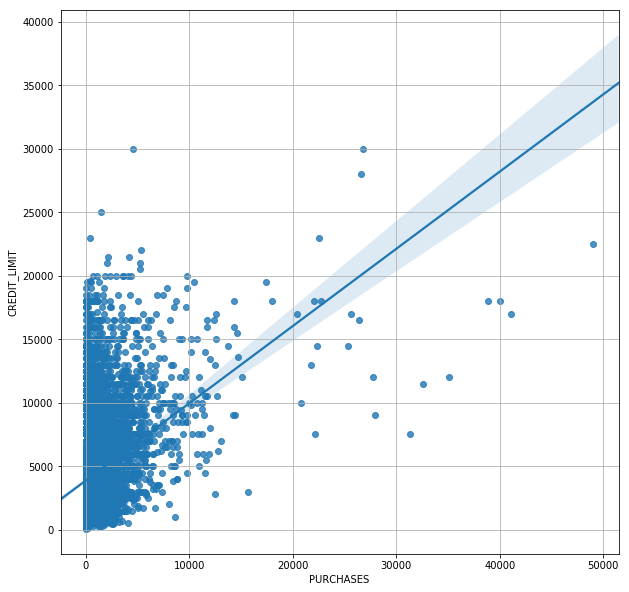

In [36]:
plt.subplots(figsize=(10,10))
sns.regplot(data['PURCHASES'],data['CREDIT_LIMIT'])
plt.grid()

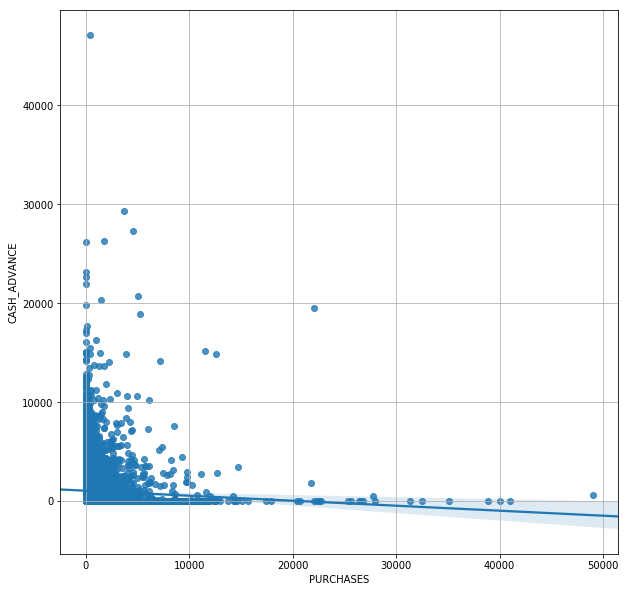

In [37]:
plt.subplots(figsize=(10,10))
sns.regplot(data['PURCHASES'],data['CASH_ADVANCE'])
plt.grid()

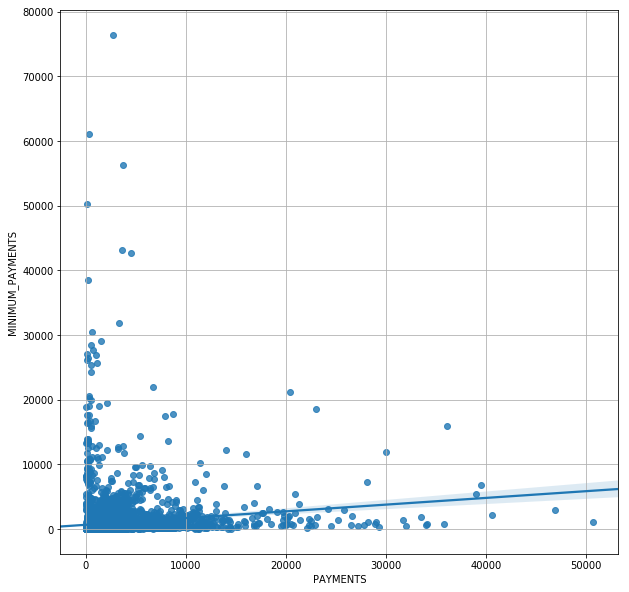

In [38]:
plt.subplots(figsize=(10,10))
sns.regplot(data['PAYMENTS'],data['MINIMUM_PAYMENTS'])
plt.grid()

In [ ]:
#CLUSTER ANALYSIS

In [41]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [40]:
data.drop('CUST_ID',axis=1,inplace=True)

In [42]:
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

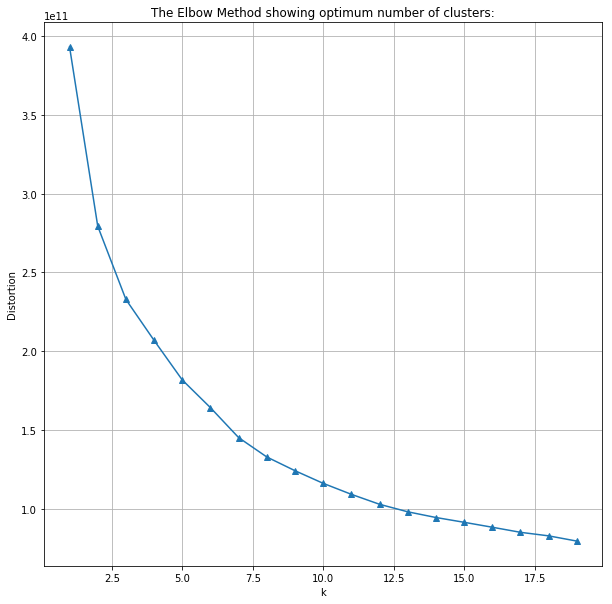

In [44]:
# Plot the elbow
plt.subplots(figsize=(10,10))
plt.plot(K, distortions, '^-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimum number of clusters:')
plt.grid()
plt.show()

In [ ]:
# The optimal number of clusters is 10

In [45]:
kmeans = KMeans(init="random", n_clusters=10)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [47]:
labels=kmeans.labels_
labels=labels.tolist()
labels=pd.Series(data=labels,index=range(len(labels)))

In [49]:
# Extracting clusters
labels_x=list()
for i in range(10):
    labels_x.append(labels[labels.values==i])

### Cluster 0

In [50]:
data.iloc[labels_x[0].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,55.0,4066.731264,2449.597200,1134.122053,2138.678431,3345.311478,5247.267365,11209.370760
BALANCE_FREQUENCY,55.0,0.988430,0.046469,0.727273,1.000000,1.000000,1.000000,1.000000
PURCHASES,55.0,1043.494727,2080.355271,0.000000,0.000000,305.780000,835.885000,11147.330000
ONEOFF_PURCHASES,55.0,119.814727,387.499654,0.000000,0.000000,0.000000,10.000000,2463.000000
INSTALLMENTS_PURCHASES,55.0,923.680000,1977.338640,0.000000,0.000000,168.000000,759.015000,10009.930000
CASH_ADVANCE,55.0,920.037169,1786.089874,0.000000,0.000000,19.345729,1114.093283,10616.270140
PURCHASES_FREQUENCY,55.0,0.470799,0.437533,0.000000,0.000000,0.333333,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,55.0,0.038430,0.077599,0.000000,0.000000,0.000000,0.041667,0.333333
PURCHASES_INSTALLMENTS_FREQUENCY,55.0,0.441598,0.453076,0.000000,0.000000,0.250000,1.000000,1.000000
CASH_ADVANCE_FREQUENCY,55.0,0.103030,0.124846,0.000000,0.000000,0.083333,0.166667,0.500000


In [51]:
cluster=data.iloc[labels_x[0].index,:]

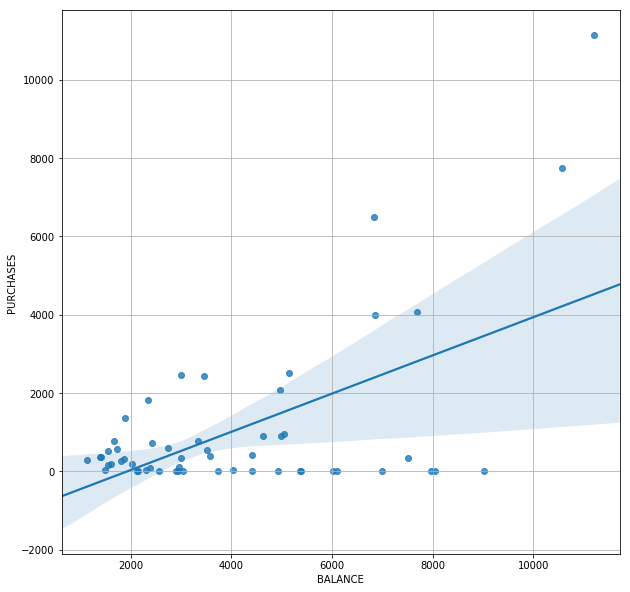

In [52]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

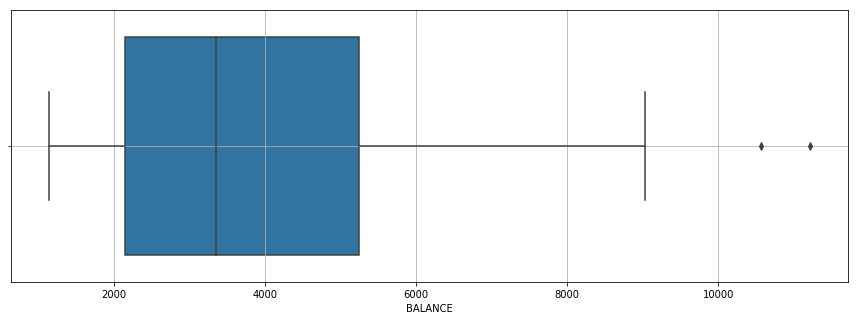

In [53]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

### Cluster 1

In [54]:
data.iloc[labels_x[1].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,110.0,3788.464931,3359.834729,348.342172,1059.903257,2708.020320,5353.843784,15244.748650
BALANCE_FREQUENCY,110.0,0.983471,0.057997,0.636364,1.000000,1.000000,1.000000,1.000000
PURCHASES,110.0,10014.695273,3179.453929,3525.370000,7859.565000,9666.105000,11519.025000,22500.000000
ONEOFF_PURCHASES,110.0,6617.523364,3450.040317,0.000000,4157.640000,6610.135000,9155.617500,16864.560000
INSTALLMENTS_PURCHASES,110.0,3397.171909,3706.240876,0.000000,636.297500,2481.025000,5021.955000,22500.000000
CASH_ADVANCE,110.0,542.836228,1182.188926,0.000000,0.000000,0.000000,217.017971,5424.701791
PURCHASES_FREQUENCY,110.0,0.913499,0.179235,0.250000,0.916667,1.000000,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,110.0,0.757369,0.293757,0.000000,0.583333,0.916667,1.000000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,110.0,0.734022,0.351620,0.000000,0.520833,0.916667,1.000000,1.000000
CASH_ADVANCE_FREQUENCY,110.0,0.068182,0.157299,0.000000,0.000000,0.000000,0.083333,0.833333


In [55]:
cluster=data.iloc[labels_x[1].index,:]

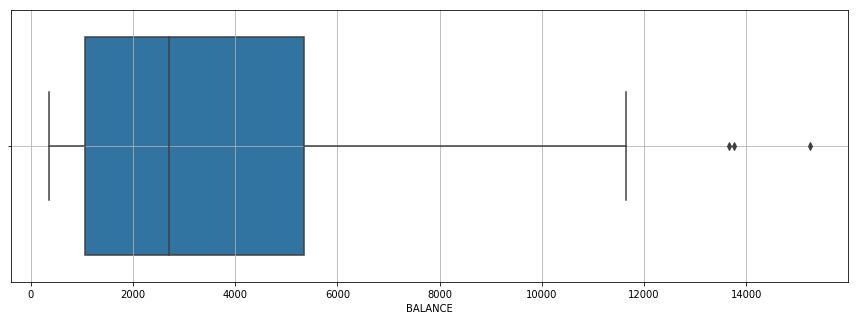

In [56]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

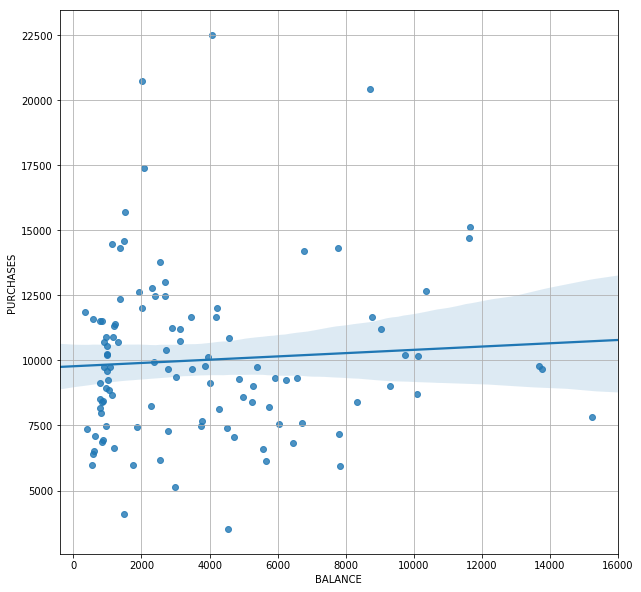

In [57]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

### Cluster 2

In [58]:
data.iloc[labels_x[2].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,121.0,5014.989826,3146.143703,4.382924,2648.244646,4925.502001,6956.376540,14581.45914
BALANCE_FREQUENCY,121.0,0.877998,0.240195,0.090909,0.900000,1.000000,1.000000,1.00000
PURCHASES,121.0,1246.479752,2189.816918,0.000000,0.000000,117.000000,1685.190000,12551.95000
ONEOFF_PURCHASES,121.0,766.046942,1549.695008,0.000000,0.000000,0.000000,785.600000,10901.24000
INSTALLMENTS_PURCHASES,121.0,480.614628,1061.163612,0.000000,0.000000,0.000000,516.270000,8409.93000
CASH_ADVANCE,121.0,10679.522385,6781.080815,0.000000,7155.612737,9799.529884,13748.471310,47137.21176
PURCHASES_FREQUENCY,121.0,0.338384,0.404913,0.000000,0.000000,0.083333,0.750000,1.00000
ONEOFF_PURCHASES_FREQUENCY,121.0,0.185019,0.286728,0.000000,0.000000,0.000000,0.250000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,121.0,0.256715,0.382422,0.000000,0.000000,0.000000,0.500000,1.00000
CASH_ADVANCE_FREQUENCY,121.0,0.491683,0.280454,0.000000,0.333333,0.500000,0.666667,1.00000


In [59]:
cluster=data.iloc[labels_x[2].index,:]

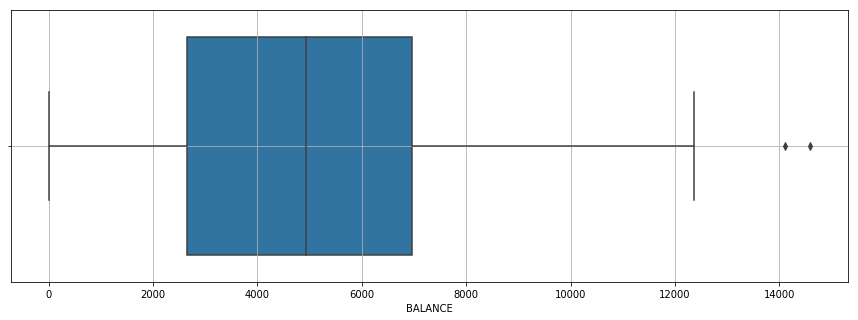

In [60]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

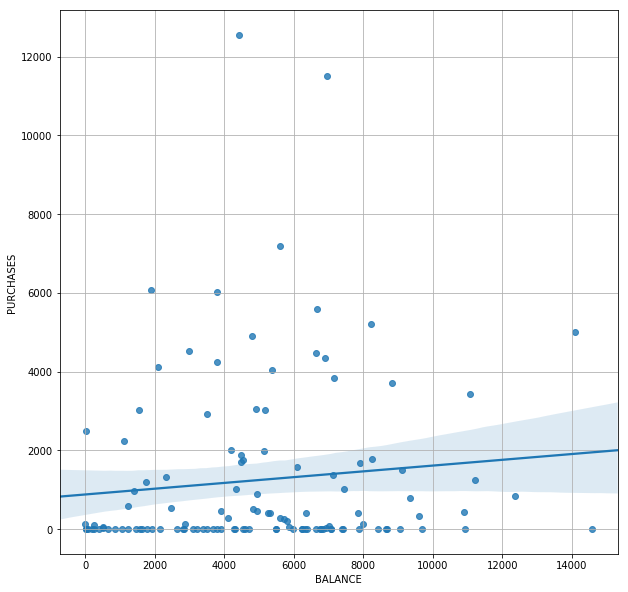

In [61]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

### Cluster 3

In [62]:
data.iloc[labels_x[3].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,320.0,8096.537705,2301.495100,3520.616355,6726.932253,7668.378458,9121.131072,18495.55855
BALANCE_FREQUENCY,320.0,0.991244,0.047000,0.545455,1.000000,1.000000,1.000000,1.00000
PURCHASES,320.0,1176.419219,1702.631404,0.000000,0.000000,337.715000,1556.825000,8533.54000
ONEOFF_PURCHASES,320.0,670.001375,1104.736342,0.000000,0.000000,84.210000,950.550000,6075.62000
INSTALLMENTS_PURCHASES,320.0,506.627063,912.522322,0.000000,0.000000,0.000000,608.665000,5423.53000
CASH_ADVANCE,320.0,4025.568667,2914.738529,0.000000,1891.089461,3681.807091,5642.045262,13674.24402
PURCHASES_FREQUENCY,320.0,0.427392,0.408920,0.000000,0.000000,0.333333,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,320.0,0.215713,0.300957,0.000000,0.000000,0.083333,0.333333,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,320.0,0.329732,0.395593,0.000000,0.000000,0.000000,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,320.0,0.364141,0.264449,0.000000,0.166667,0.333333,0.500000,1.12500


In [ ]:
cluster=data.iloc[labels_x[3].index,:]

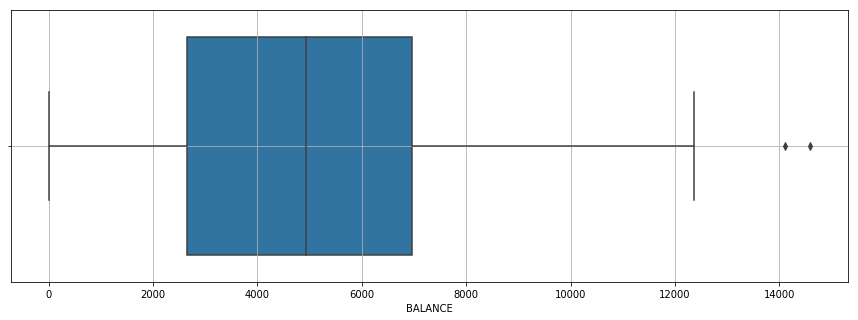

In [63]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

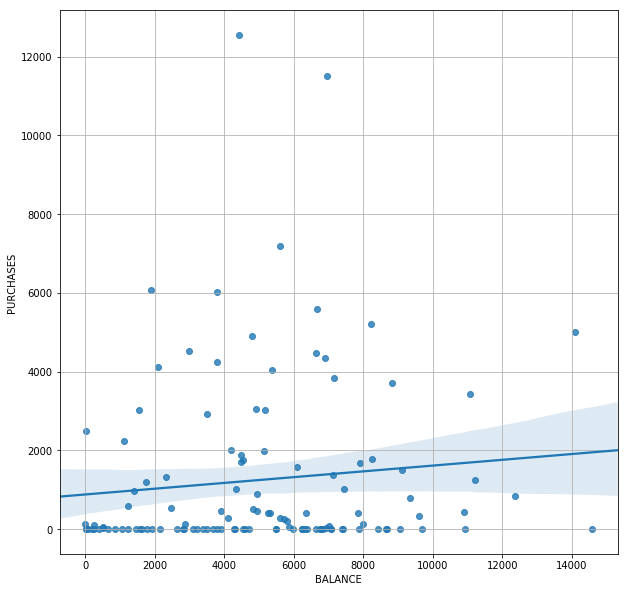

In [64]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

### Cluster 4

In [65]:
data.iloc[labels_x[4].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,1443.0,807.066944,998.757446,0.000000,70.094065,279.501554,1348.297895,4624.411724
BALANCE_FREQUENCY,1443.0,0.860418,0.250126,0.000000,0.818182,1.000000,1.000000,1.000000
PURCHASES,1443.0,949.598122,860.059854,0.000000,237.495000,734.970000,1478.630000,4504.250000
ONEOFF_PURCHASES,1443.0,520.839508,642.322138,0.000000,0.000000,264.000000,842.950000,3649.830000
INSTALLMENTS_PURCHASES,1443.0,429.329390,581.805877,0.000000,0.000000,188.310000,607.030000,3215.130000
CASH_ADVANCE,1443.0,197.656853,516.686869,0.000000,0.000000,0.000000,0.000000,4034.656192
PURCHASES_FREQUENCY,1443.0,0.594873,0.371006,0.000000,0.250000,0.666667,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,1443.0,0.287723,0.332264,0.000000,0.000000,0.166667,0.500000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,1443.0,0.412341,0.392908,0.000000,0.000000,0.333333,0.818182,1.000000
CASH_ADVANCE_FREQUENCY,1443.0,0.047535,0.115635,0.000000,0.000000,0.000000,0.000000,0.833333


In [70]:
cluster=data.iloc[labels_x[4].index,:]

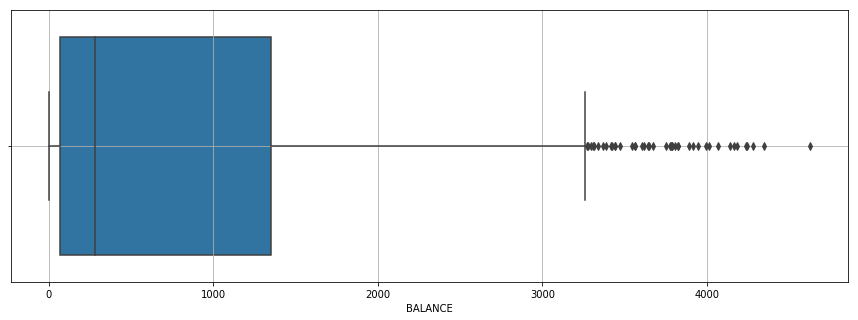

In [71]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

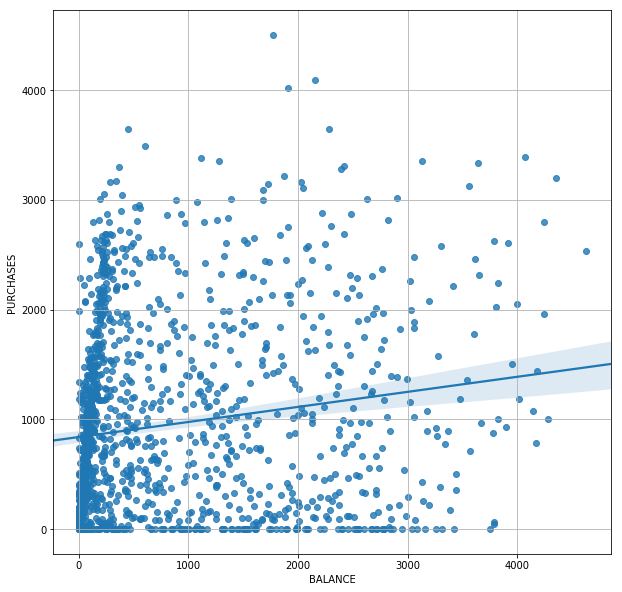

In [72]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

### Cluster 5

In [73]:
data.iloc[labels_x[5].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,479.0,1485.198501,1367.351056,0.000000,435.317643,902.099225,2289.292163,6443.077147
BALANCE_FREQUENCY,479.0,0.933247,0.170852,0.000000,1.000000,1.000000,1.000000,1.000000
PURCHASES,479.0,4023.325094,1716.303114,0.000000,3055.965000,3876.000000,5018.070000,8834.960000
ONEOFF_PURCHASES,479.0,2663.839436,1696.321351,0.000000,1444.495000,2549.650000,3626.975000,8636.730000
INSTALLMENTS_PURCHASES,479.0,1360.840564,1349.641141,0.000000,305.820000,1066.880000,1989.105000,7571.400000
CASH_ADVANCE,479.0,489.501753,1076.837032,0.000000,0.000000,0.000000,275.748667,6419.421654
PURCHASES_FREQUENCY,479.0,0.855435,0.260072,0.000000,0.833333,1.000000,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,479.0,0.606641,0.328303,0.000000,0.333333,0.666667,0.916667,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,479.0,0.651357,0.390258,0.000000,0.303030,0.833333,1.000000,1.000000
CASH_ADVANCE_FREQUENCY,479.0,0.066832,0.135049,0.000000,0.000000,0.000000,0.083333,0.833333


In [74]:
cluster=data.iloc[labels_x[5].index,:]

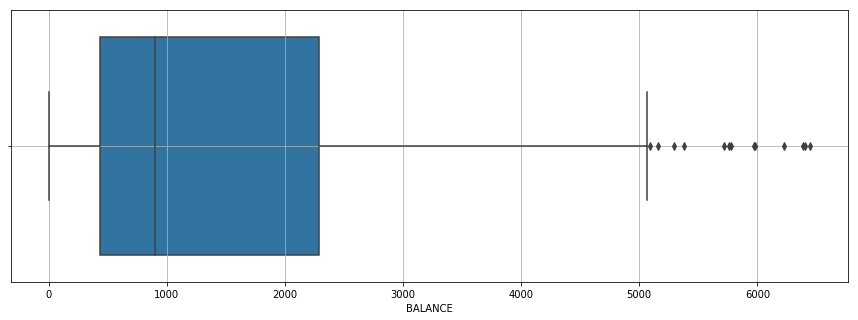

In [75]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

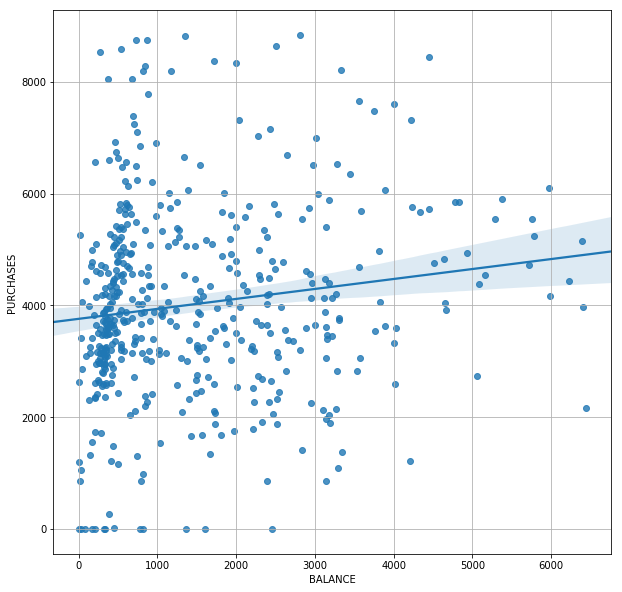

In [76]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

### Cluster 6

In [77]:
data.iloc[labels_x[6].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,447.0,1546.460410,1824.886390,0.488050,131.400918,467.244925,3025.730664,6537.852206
BALANCE_FREQUENCY,447.0,0.874101,0.233131,0.090909,0.833333,1.000000,1.000000,1.000000
PURCHASES,447.0,1579.172170,1476.160366,0.000000,386.745000,1156.000000,2360.300000,6407.670000
ONEOFF_PURCHASES,447.0,1010.169911,1177.082635,0.000000,62.345000,603.750000,1516.360000,6300.400000
INSTALLMENTS_PURCHASES,447.0,569.002260,756.841066,0.000000,0.000000,260.400000,835.640000,4116.000000
CASH_ADVANCE,447.0,407.507982,977.447212,0.000000,0.000000,0.000000,126.425643,6523.780195
PURCHASES_FREQUENCY,447.0,0.657282,0.370928,0.000000,0.333333,0.833333,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,447.0,0.409337,0.371194,0.000000,0.083333,0.333333,0.750000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,447.0,0.439305,0.396009,0.000000,0.000000,0.416667,0.833333,1.000000
CASH_ADVANCE_FREQUENCY,447.0,0.063011,0.135799,0.000000,0.000000,0.000000,0.083333,0.833333


In [78]:
cluster=data.iloc[labels_x[6].index,:]

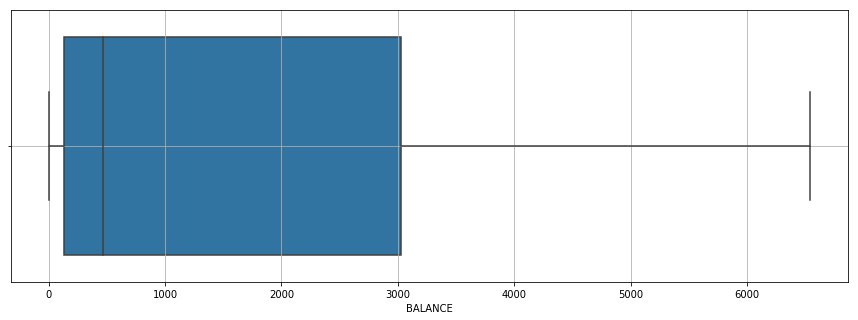

In [79]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

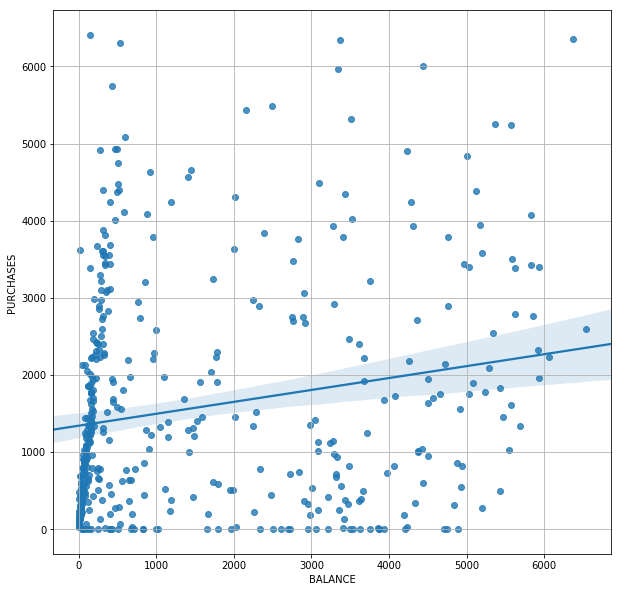

In [80]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

### Cluster 7

In [81]:
data.iloc[labels_x[7].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,4945.0,761.810759,774.888025,0.000000,67.593395,535.291589,1224.513636,3983.923705
BALANCE_FREQUENCY,4945.0,0.848929,0.259884,0.000000,0.818182,1.000000,1.000000,1.000000
PURCHASES,4945.0,453.991672,588.212713,0.000000,0.240000,240.100000,626.980000,3986.240000
ONEOFF_PURCHASES,4945.0,211.309027,424.035381,0.000000,0.000000,0.000000,214.380000,3420.970000
INSTALLMENTS_PURCHASES,4945.0,242.903137,397.296672,0.000000,0.000000,61.260000,343.820000,3520.000000
CASH_ADVANCE,4945.0,421.356438,721.437573,0.000000,0.000000,0.000000,578.660857,5191.738847
PURCHASES_FREQUENCY,4945.0,0.444663,0.391868,0.000000,0.083333,0.375000,0.857143,1.000000
ONEOFF_PURCHASES_FREQUENCY,4945.0,0.120419,0.216577,0.000000,0.000000,0.000000,0.166667,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,4945.0,0.343685,0.389631,0.000000,0.000000,0.166667,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,4945.0,0.106227,0.160972,0.000000,0.000000,0.000000,0.166667,1.000000


In [82]:
cluster=data.iloc[labels_x[7].index,:]

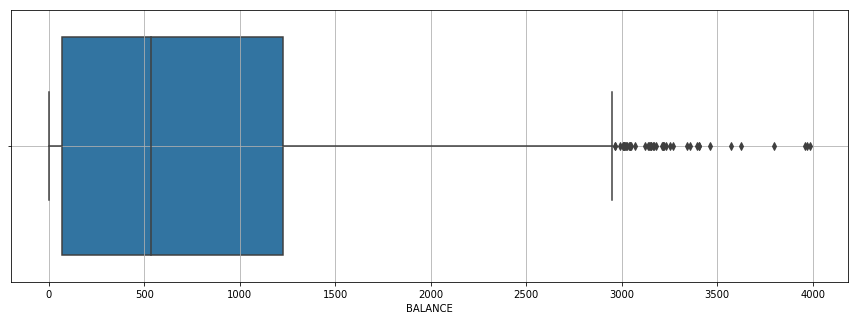

In [83]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

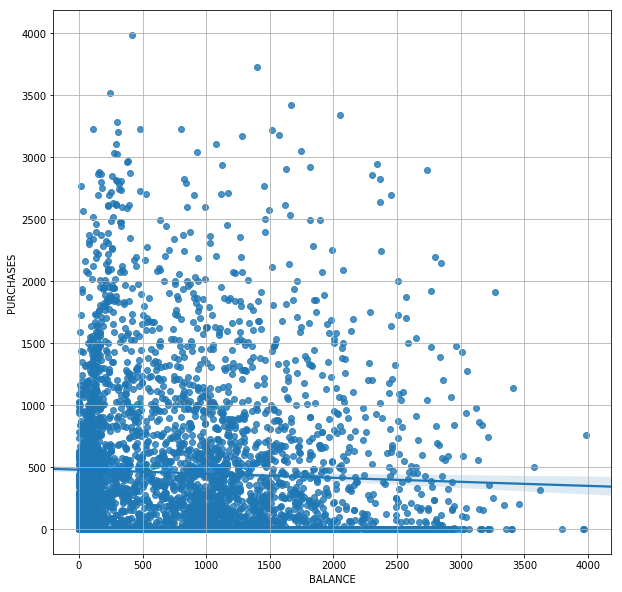

In [84]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

### Cluster 8

In [85]:
data.iloc[labels_x[8].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,20.0,5626.564299,4550.019650,1268.809031,2928.603417,3422.898250,6817.133432,19043.138560
BALANCE_FREQUENCY,20.0,0.949545,0.165604,0.272727,1.000000,1.000000,1.000000,1.000000
PURCHASES,20.0,29175.132000,8011.633856,17945.000000,22655.600000,26683.480000,33187.625000,49039.570000
ONEOFF_PURCHASES,20.0,23650.721500,8337.486349,9449.070000,18784.475000,22179.585000,26522.597500,40761.250000
INSTALLMENTS_PURCHASES,20.0,5524.410500,5110.336186,0.000000,475.810000,4828.500000,9064.600000,15497.190000
CASH_ADVANCE,20.0,1115.627041,4350.161331,0.000000,0.000000,0.000000,0.000000,19513.474830
PURCHASES_FREQUENCY,20.0,0.890833,0.241915,0.166667,0.975000,1.000000,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,20.0,0.827500,0.254393,0.166667,0.666667,1.000000,1.000000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,20.0,0.665000,0.386425,0.000000,0.395834,0.833333,1.000000,1.000000
CASH_ADVANCE_FREQUENCY,20.0,0.045833,0.149255,0.000000,0.000000,0.000000,0.000000,0.666667


In [86]:
cluster=data.iloc[labels_x[8].index,:]

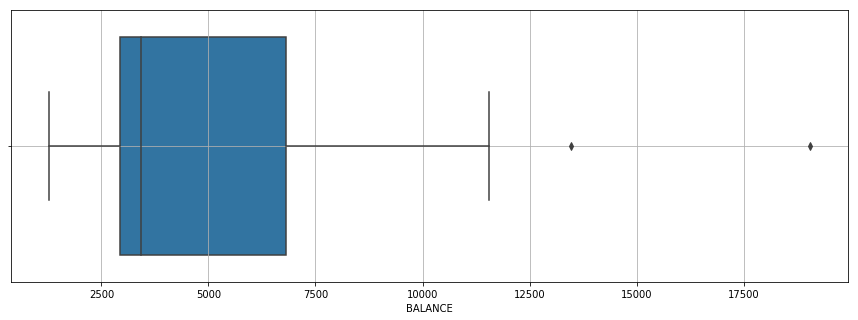

In [87]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

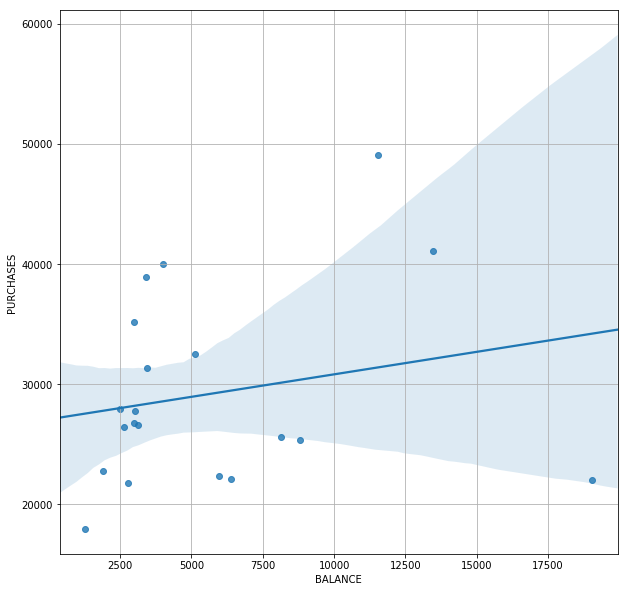

In [88]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

### Cluster 9

In [89]:
data.iloc[labels_x[9].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,1009.0,3683.808859,1510.088438,166.295463,2572.293007,3702.768802,4785.789559,7370.257624
BALANCE_FREQUENCY,1009.0,0.960505,0.107862,0.181818,1.000000,1.000000,1.000000,1.000000
PURCHASES,1009.0,456.463964,706.513533,0.000000,0.000000,82.000000,645.830000,4085.810000
ONEOFF_PURCHASES,1009.0,261.319078,508.662410,0.000000,0.000000,0.000000,298.590000,3531.240000
INSTALLMENTS_PURCHASES,1009.0,195.179296,406.111321,0.000000,0.000000,0.000000,209.900000,2917.190000
CASH_ADVANCE,1009.0,3233.126875,2070.950943,0.000000,1805.853456,3027.725404,4344.905863,10735.101800
PURCHASES_FREQUENCY,1009.0,0.303185,0.369145,0.000000,0.000000,0.083333,0.583333,1.000000
ONEOFF_PURCHASES_FREQUENCY,1009.0,0.133196,0.230201,0.000000,0.000000,0.000000,0.166667,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,1009.0,0.202088,0.330025,0.000000,0.000000,0.000000,0.333333,1.000000
CASH_ADVANCE_FREQUENCY,1009.0,0.361949,0.231037,0.000000,0.166667,0.333333,0.500000,1.500000


In [90]:
cluster=data.iloc[labels_x[9].index,:]

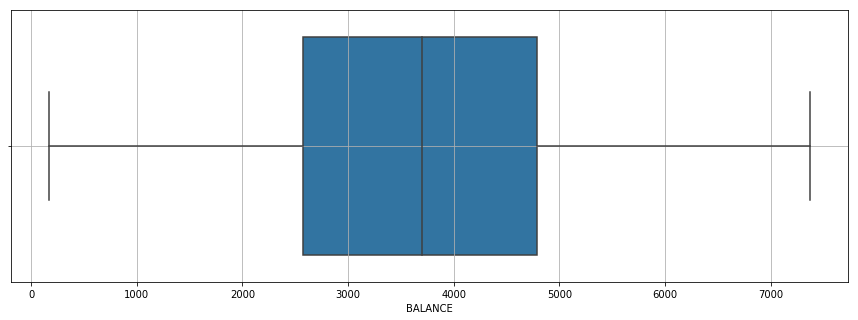

In [91]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

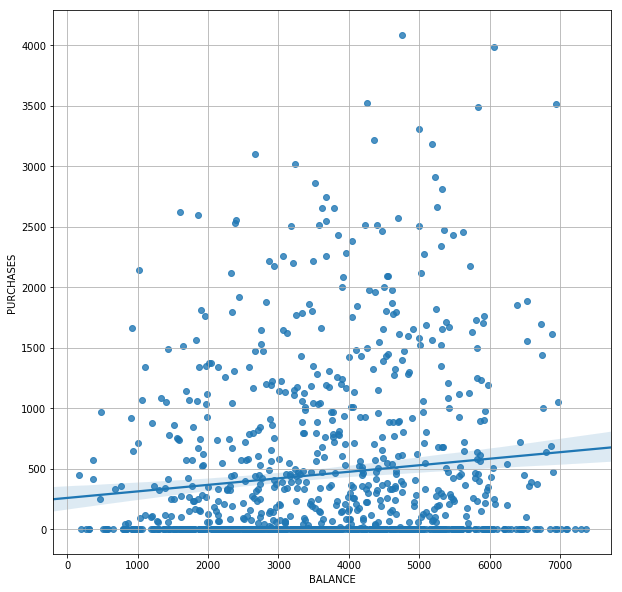

In [92]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

In [ ]:
#Outlier Treatment

In [93]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
x=q3-q1
lower=q1-(1.5*x)
upper=q3+(1.5*x)

In [94]:
num=list()
for i in data.columns:
    if i in lower.index:
        num.append(i)

In [95]:
data=data[num]

In [96]:
data=data[~((data < (q1 - 1.5 * x))|(data > (q3 + 1.5 * x))).any(axis=1)]

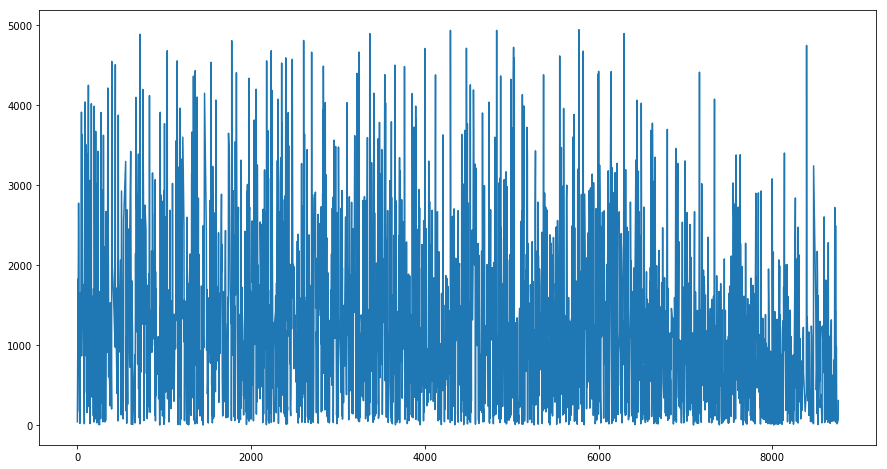

In [97]:
data['BALANCE'].plot(figsize=(15,8))

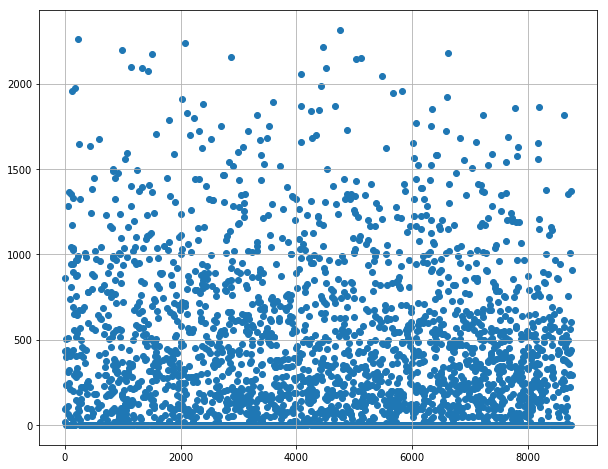

In [98]:
plt.subplots(figsize=(10,8))
plt.scatter(data.index,data['PURCHASES'])
plt.grid()

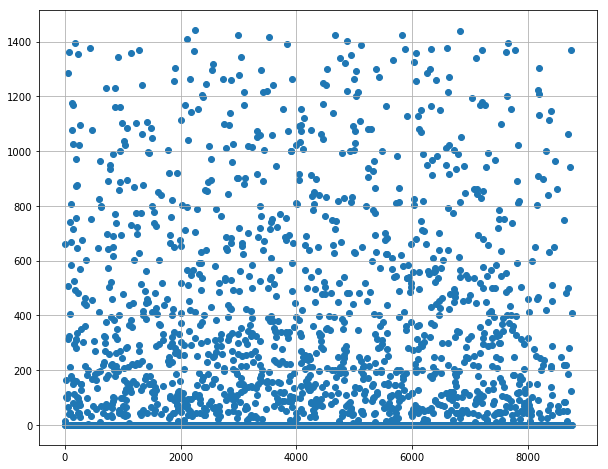

In [99]:
plt.subplots(figsize=(10,8))
plt.scatter(data.index,data['ONEOFF_PURCHASES'])
plt.grid()

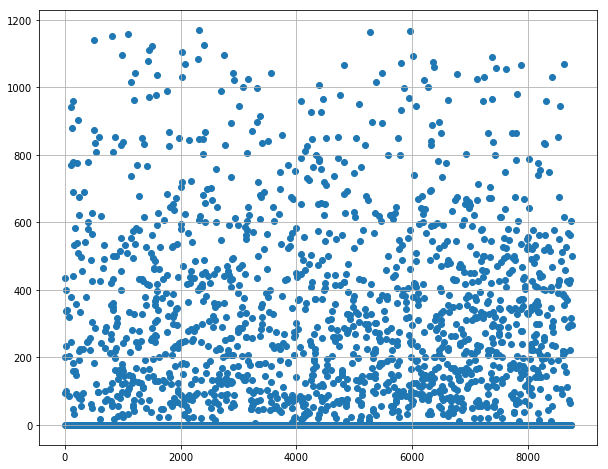

In [100]:
plt.subplots(figsize=(10,8))
plt.scatter(data.index,data['INSTALLMENTS_PURCHASES'])
plt.grid()

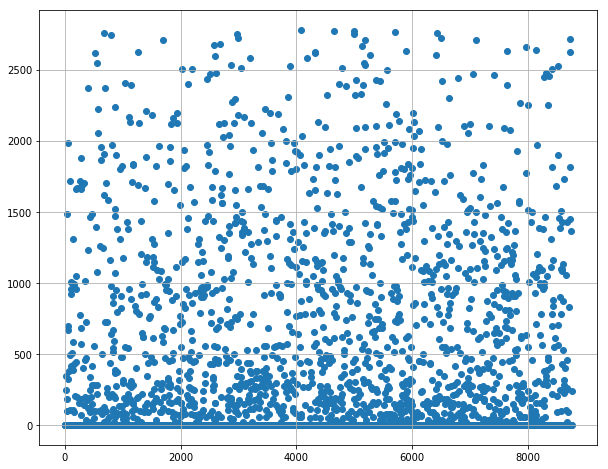

In [101]:
plt.subplots(figsize=(10,8))
plt.scatter(data.index,data['CASH_ADVANCE'])
plt.grid()

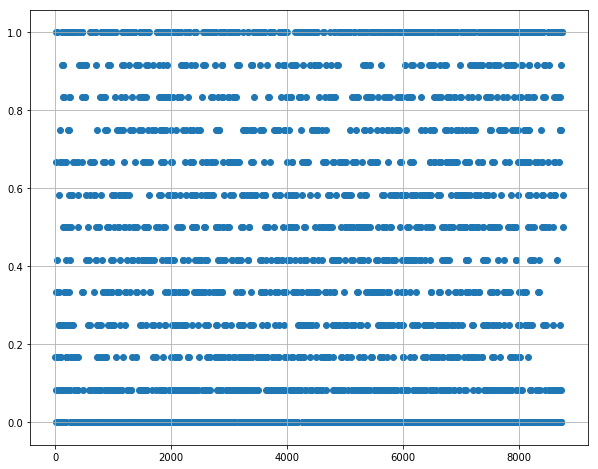

In [102]:
plt.subplots(figsize=(10,8))
plt.scatter(data.index,data['PURCHASES_FREQUENCY'])
plt.grid()

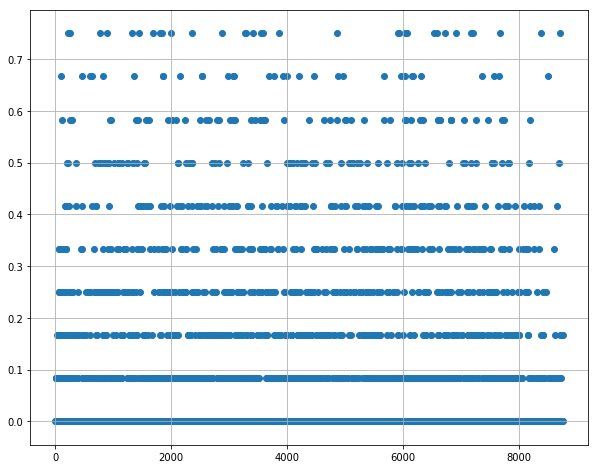

In [103]:
plt.subplots(figsize=(10,8))
plt.scatter(data.index,data['ONEOFF_PURCHASES_FREQUENCY'])
plt.grid()

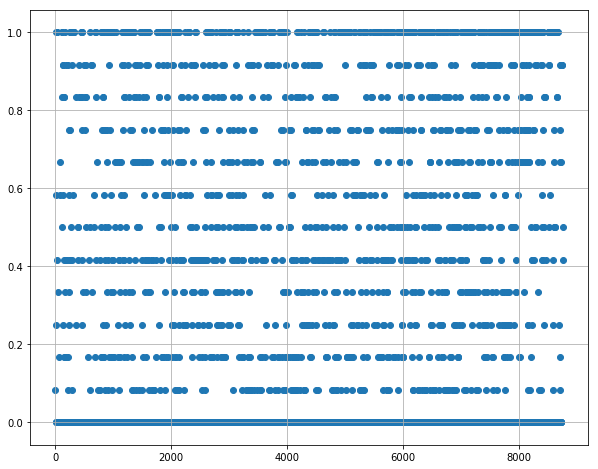

In [104]:
plt.subplots(figsize=(10,8))
plt.scatter(data.index,data['PURCHASES_INSTALLMENTS_FREQUENCY'])
plt.grid()

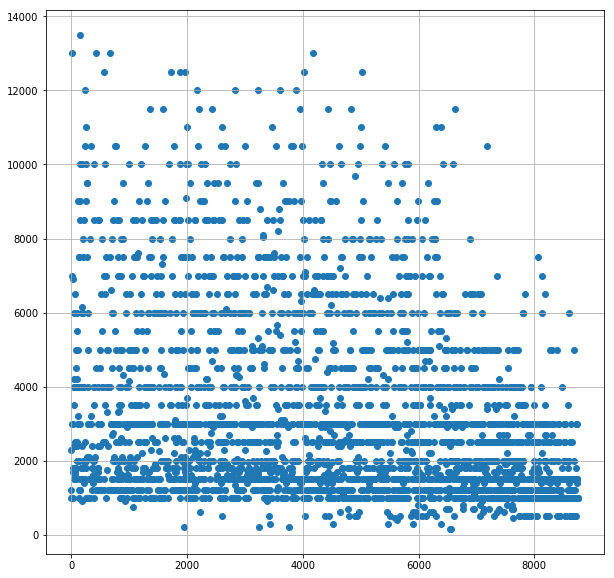

In [105]:
plt.subplots(figsize=(10,10))
plt.scatter(data.index,data['CREDIT_LIMIT'])
plt.grid()

In [106]:
print(pearsonr(data['PURCHASES'],data['INSTALLMENTS_PURCHASES']))

(0.6688900665933358, 0.0)


In [107]:
print(pearsonr(data['PURCHASES'],data['BALANCE']))

(-0.033514330319000925, 0.06708340452056054)


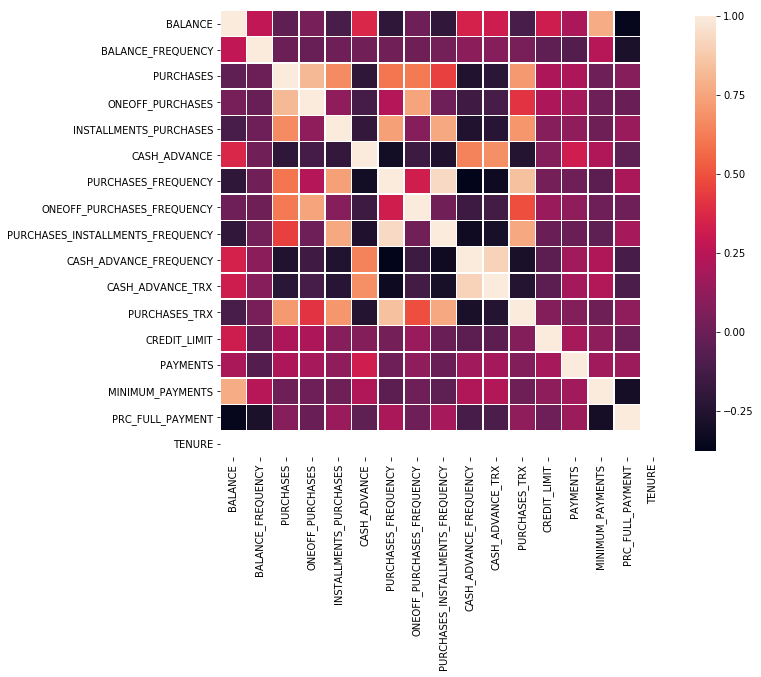

In [108]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, square=True, linewidths=.5, cbar_kws={"shrink": .8}, ax=ax)
plt.show()

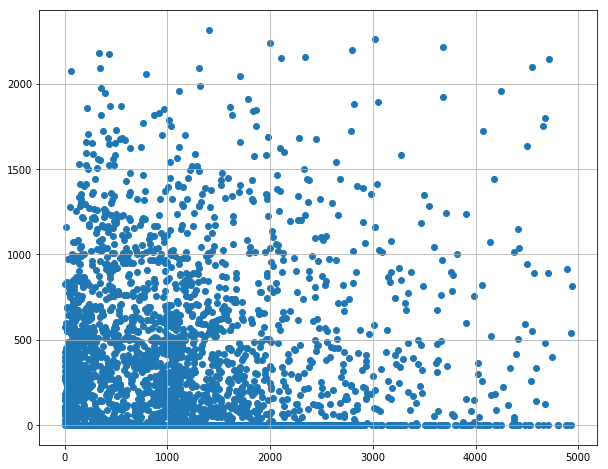

In [109]:
plt.subplots(figsize=(10,8))
plt.scatter(data['BALANCE'],data['PURCHASES'])
plt.grid()

C:\Users\SESA475934\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\SESA475934\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


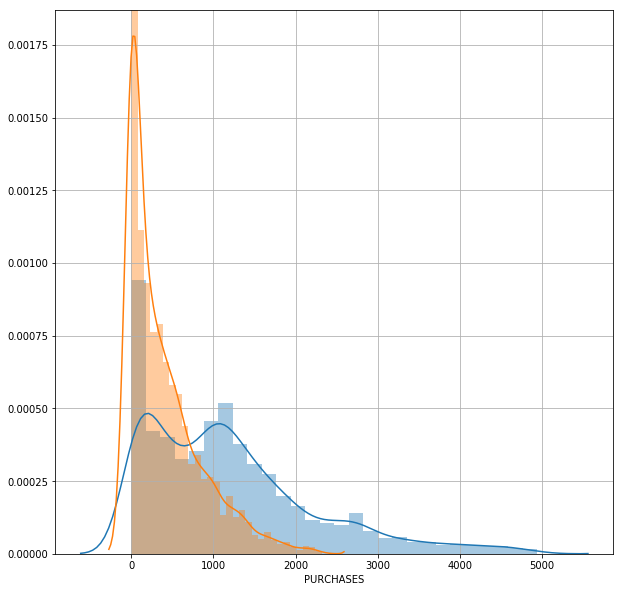

In [110]:
plt.subplots(figsize=(10,10))
sns.distplot(data['BALANCE'])
sns.distplot(data['PURCHASES'])
plt.grid()

C:\Users\SESA475934\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\SESA475934\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


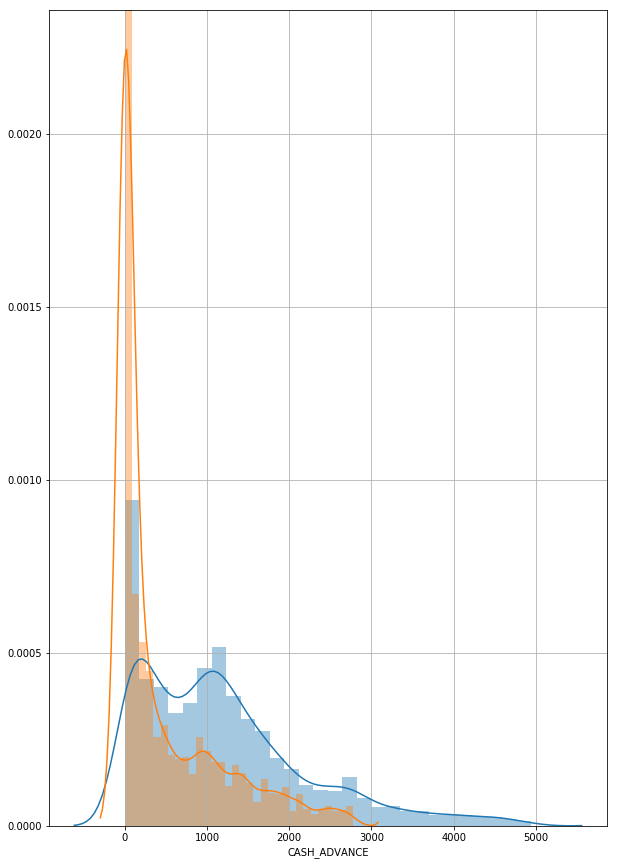

In [111]:
plt.subplots(figsize=(10,15))
sns.distplot(data['BALANCE'])
sns.distplot(data['CASH_ADVANCE'])
plt.grid()

C:\Users\SESA475934\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\SESA475934\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


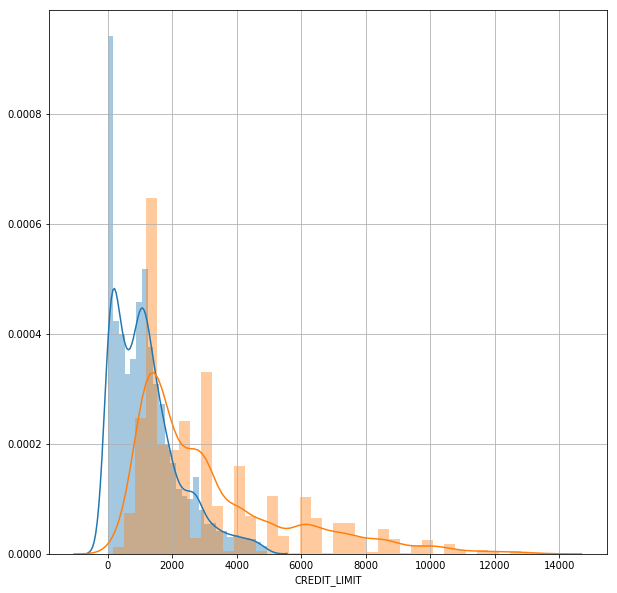

In [112]:
plt.subplots(figsize=(10,10))
sns.distplot(data['BALANCE'])
sns.distplot(data['CREDIT_LIMIT'])
plt.grid()

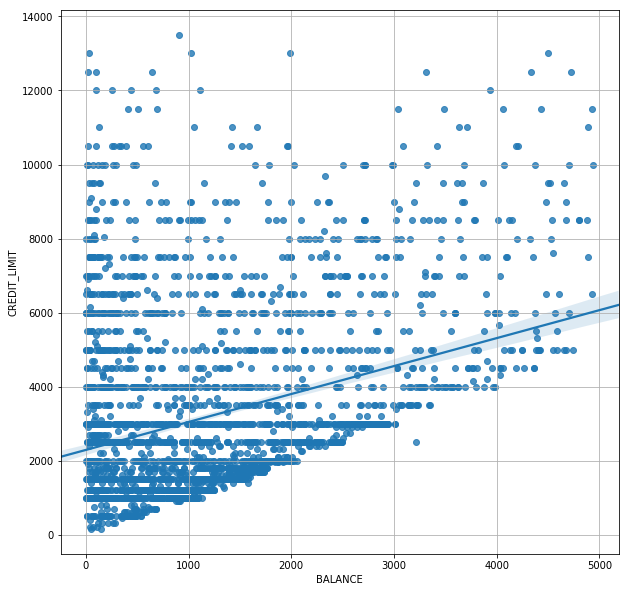

In [113]:
plt.subplots(figsize=(10,10))
sns.regplot(data['BALANCE'],data['CREDIT_LIMIT'])
plt.grid()

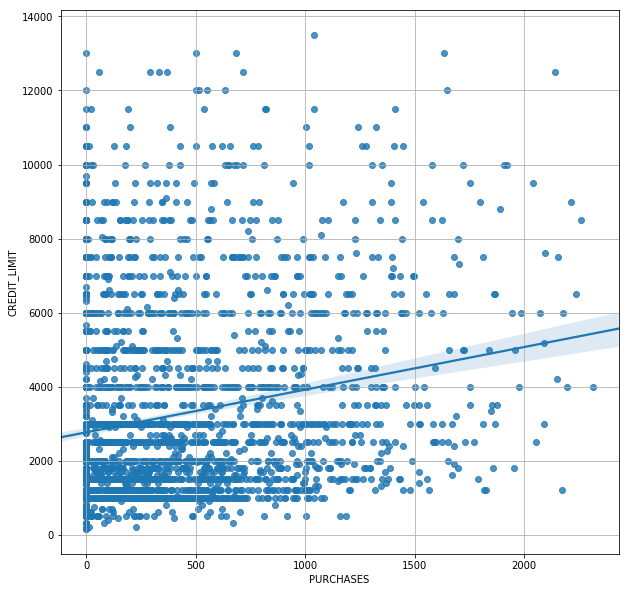

In [114]:
plt.subplots(figsize=(10,10))
sns.regplot(data['PURCHASES'],data['CREDIT_LIMIT'])
plt.grid()

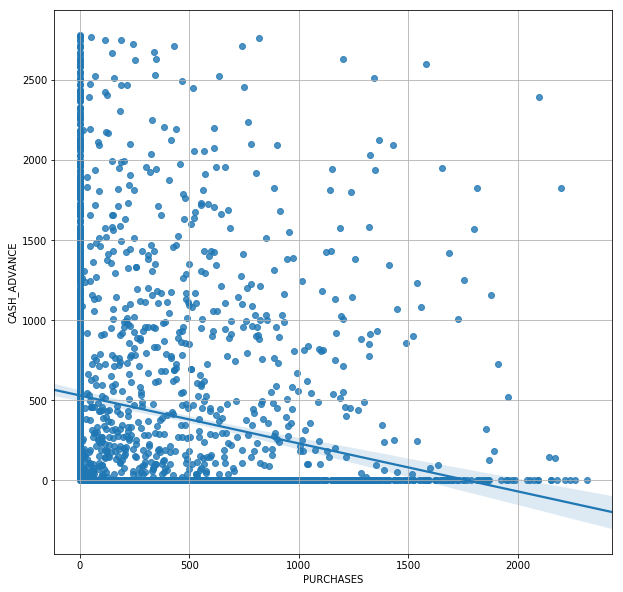

In [115]:
plt.subplots(figsize=(10,10))
sns.regplot(data['PURCHASES'],data['CASH_ADVANCE'])
plt.grid()

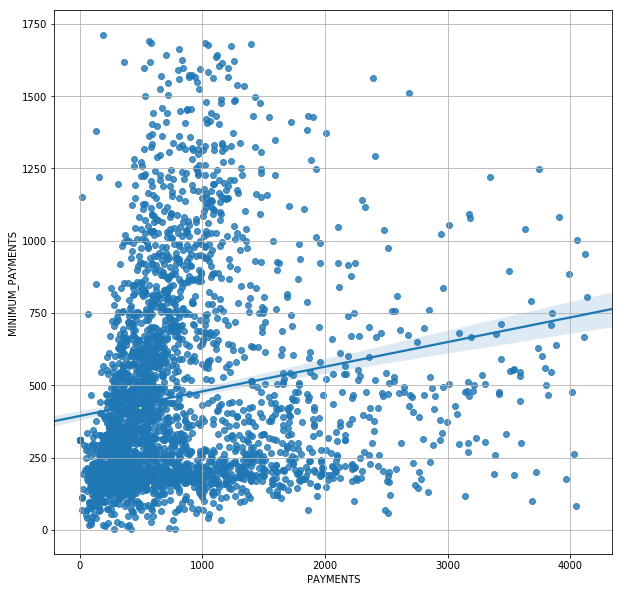

In [116]:
plt.subplots(figsize=(10,10))
sns.regplot(data['PAYMENTS'],data['MINIMUM_PAYMENTS'])
plt.grid()

In [117]:
#CLUSTER ANALYSIS

In [118]:
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

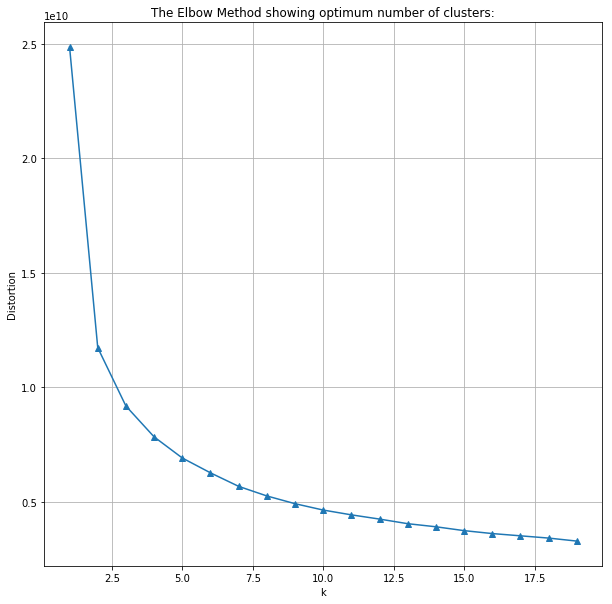

In [119]:
# Plot the elbow
plt.subplots(figsize=(10,10))
plt.plot(K, distortions, '^-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimum number of clusters:')
plt.grid()
plt.show()

In [ ]:
#Number of optimum clusters will be 10

In [120]:
kmeans = KMeans(init="random", n_clusters=10)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [122]:
labels=kmeans.labels_
labels=labels.tolist()
labels=pd.Series(data=labels,index=range(len(labels)))

In [123]:
#Extracting clusters
labels_x=list()
for i in range(10):
    labels_x.append(labels[labels.values==i])

In [124]:
#Cluster 0:

In [125]:
data.iloc[labels_x[0].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,160.0,3311.352543,793.713129,1592.102979,2683.888278,3306.624962,3957.032301,4931.203112
BALANCE_FREQUENCY,160.0,0.999432,0.007187,0.909091,1.000000,1.000000,1.000000,1.000000
PURCHASES,160.0,309.386062,448.852694,0.000000,0.000000,56.565000,472.767500,2197.210000
ONEOFF_PURCHASES,160.0,195.295813,328.400085,0.000000,0.000000,0.000000,280.100000,1443.330000
INSTALLMENTS_PURCHASES,160.0,114.090250,229.353232,0.000000,0.000000,0.000000,107.397500,1095.450000
CASH_ADVANCE,160.0,1219.595833,866.191054,0.000000,364.206349,1215.489300,1948.485040,2780.106659
PURCHASES_FREQUENCY,160.0,0.263021,0.324913,0.000000,0.000000,0.083333,0.500000,1.000000
ONEOFF_PURCHASES_FREQUENCY,160.0,0.110417,0.178204,0.000000,0.000000,0.000000,0.166667,0.750000
PURCHASES_INSTALLMENTS_FREQUENCY,160.0,0.167187,0.287082,0.000000,0.000000,0.000000,0.250000,1.000000
CASH_ADVANCE_FREQUENCY,160.0,0.206771,0.147176,0.000000,0.083333,0.166667,0.333333,0.500000


In [126]:
cluster=data.iloc[labels_x[0].index,:]

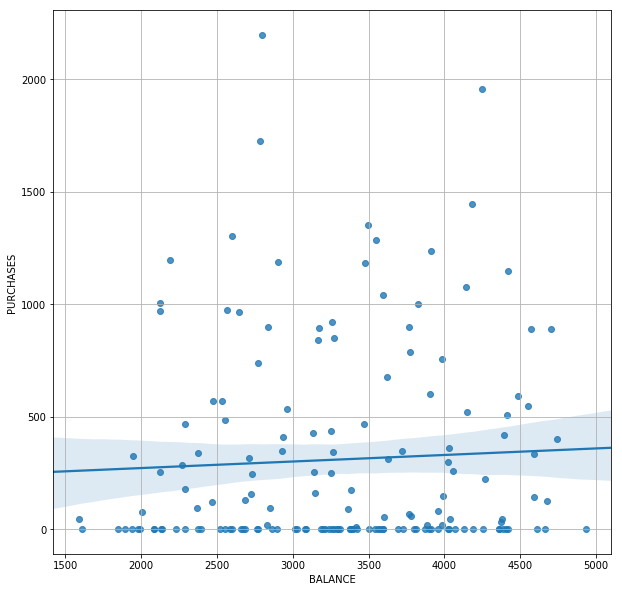

In [127]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

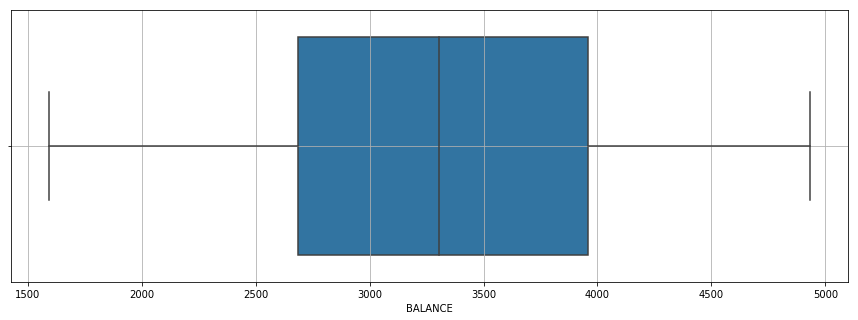

In [128]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

In [ ]:
#Cluster 1:

In [129]:
data.iloc[labels_x[1].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,689.0,1299.549272,291.202818,566.147105,1073.424810,1248.193121,1502.444690,2052.325610
BALANCE_FREQUENCY,689.0,0.998285,0.017244,0.727273,1.000000,1.000000,1.000000,1.000000
PURCHASES,689.0,245.797286,327.050707,0.000000,0.000000,110.000000,387.680000,1956.430000
ONEOFF_PURCHASES,689.0,119.509478,233.380503,0.000000,0.000000,0.000000,133.900000,1423.800000
INSTALLMENTS_PURCHASES,689.0,126.886821,217.730015,0.000000,0.000000,0.000000,180.000000,1164.000000
CASH_ADVANCE,689.0,207.610727,316.755085,0.000000,0.000000,73.870282,272.520678,1520.641388
PURCHASES_FREQUENCY,689.0,0.314949,0.361437,0.000000,0.000000,0.166667,0.583333,1.000000
ONEOFF_PURCHASES_FREQUENCY,689.0,0.090711,0.151689,0.000000,0.000000,0.000000,0.083333,0.750000
PURCHASES_INSTALLMENTS_FREQUENCY,689.0,0.238994,0.356382,0.000000,0.000000,0.000000,0.500000,1.000000
CASH_ADVANCE_FREQUENCY,689.0,0.112482,0.123485,0.000000,0.000000,0.083333,0.166667,0.500000


In [130]:
cluster=data.iloc[labels_x[1].index,:]

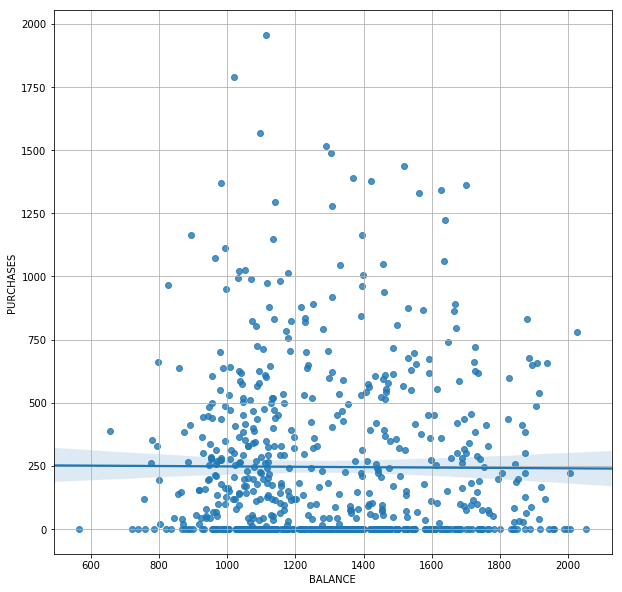

In [131]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

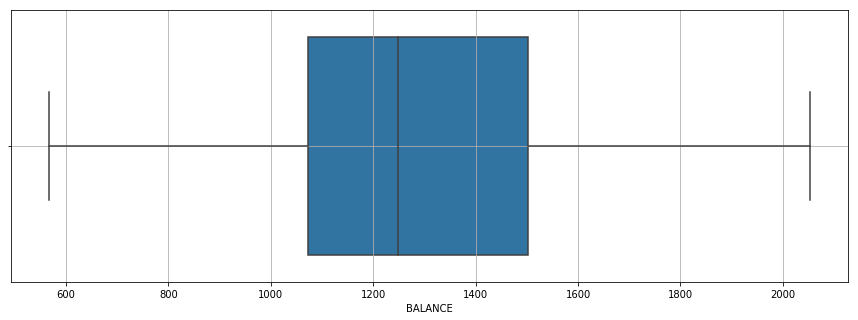

In [132]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

In [ ]:
#Cluster 2:

In [133]:
data.iloc[labels_x[2].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,293.0,666.491128,637.340028,1.198223,124.732546,437.735369,1192.594159,2450.031338
BALANCE_FREQUENCY,293.0,0.964940,0.078083,0.727273,1.000000,1.000000,1.000000,1.000000
PURCHASES,293.0,571.145188,524.064639,0.000000,147.780000,404.000000,891.660000,2238.000000
ONEOFF_PURCHASES,293.0,317.809659,381.398611,0.000000,0.000000,153.950000,515.600000,1424.870000
INSTALLMENTS_PURCHASES,293.0,254.308055,311.423555,0.000000,0.000000,133.000000,424.760000,1152.830000
CASH_ADVANCE,293.0,164.544571,404.821583,0.000000,0.000000,0.000000,18.427395,2234.780695
PURCHASES_FREQUENCY,293.0,0.484642,0.363309,0.000000,0.166667,0.416667,0.833333,1.000000
ONEOFF_PURCHASES_FREQUENCY,293.0,0.172924,0.196063,0.000000,0.000000,0.083333,0.250000,0.750000
PURCHASES_INSTALLMENTS_FREQUENCY,293.0,0.359215,0.385684,0.000000,0.000000,0.166667,0.666667,1.000000
CASH_ADVANCE_FREQUENCY,293.0,0.040387,0.085193,0.000000,0.000000,0.000000,0.083333,0.500000


In [134]:
cluster=data.iloc[labels_x[2].index,:]

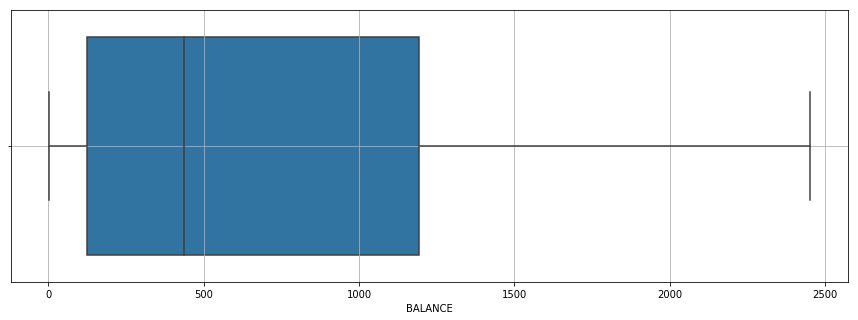

In [135]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

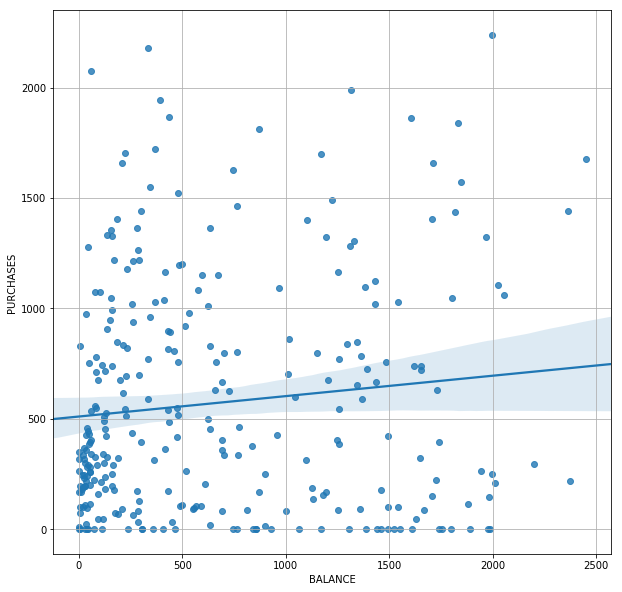

In [136]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

In [137]:
#Cluster 3:

In [138]:
data.iloc[labels_x[3].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,134.0,3195.330096,902.132672,996.223227,2438.774089,3055.355927,3867.381715,4940.113918
BALANCE_FREQUENCY,134.0,0.997965,0.017508,0.818182,1.000000,1.000000,1.000000,1.000000
PURCHASES,134.0,539.479030,606.330517,0.000000,0.000000,306.740000,937.897500,2260.410000
ONEOFF_PURCHASES,134.0,340.249328,438.811172,0.000000,0.000000,115.615000,588.542500,1376.540000
INSTALLMENTS_PURCHASES,134.0,199.229701,314.558623,0.000000,0.000000,0.000000,301.870000,1170.490000
CASH_ADVANCE,134.0,623.008300,752.458838,0.000000,0.000000,270.957880,1068.571167,2747.982493
PURCHASES_FREQUENCY,134.0,0.356965,0.350082,0.000000,0.000000,0.250000,0.583333,1.000000
ONEOFF_PURCHASES_FREQUENCY,134.0,0.150497,0.191855,0.000000,0.000000,0.083333,0.250000,0.750000
PURCHASES_INSTALLMENTS_FREQUENCY,134.0,0.257463,0.341758,0.000000,0.000000,0.000000,0.416667,1.000000
CASH_ADVANCE_FREQUENCY,134.0,0.123134,0.141494,0.000000,0.000000,0.083333,0.250000,0.500000


In [139]:
cluster=data.iloc[labels_x[3].index,:]

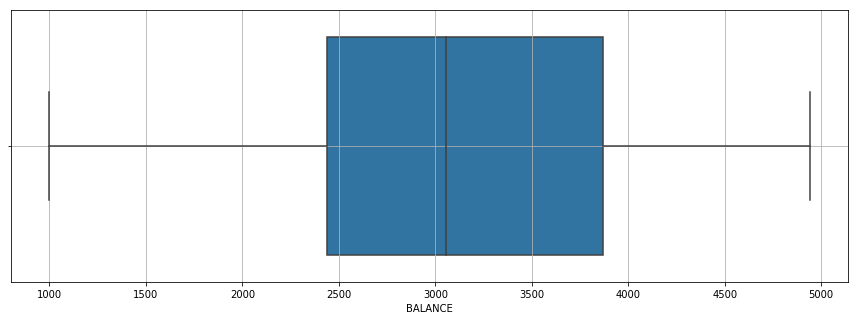

In [140]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

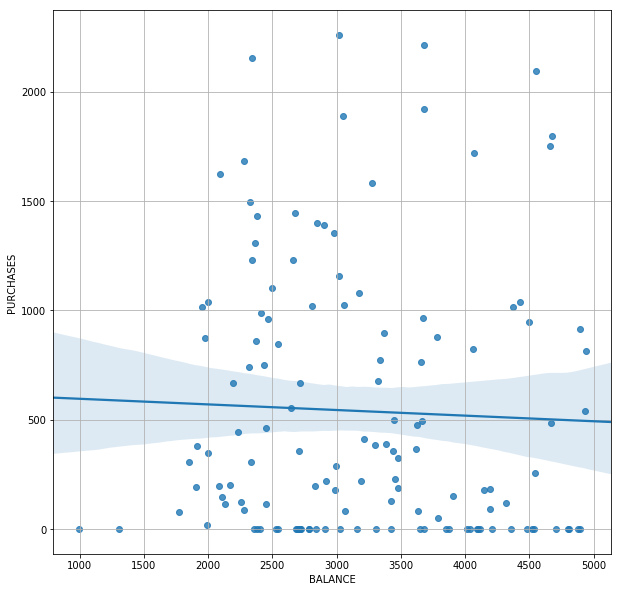

In [141]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

In [142]:
#Cluster 4:

In [143]:
data.iloc[labels_x[4].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,438.0,460.129672,429.836596,2.117128,83.995466,313.711904,784.039275,1861.087370
BALANCE_FREQUENCY,438.0,0.965131,0.078947,0.727273,1.000000,1.000000,1.000000,1.000000
PURCHASES,438.0,499.383470,440.701382,0.000000,130.395000,393.685000,759.250000,2053.780000
ONEOFF_PURCHASES,438.0,251.835525,360.908118,0.000000,0.000000,59.500000,429.890000,1417.180000
INSTALLMENTS_PURCHASES,438.0,247.547945,270.207318,0.000000,0.000000,150.140000,409.997500,1166.680000
CASH_ADVANCE,438.0,146.928308,347.959196,0.000000,0.000000,0.000000,0.000000,1820.800715
PURCHASES_FREQUENCY,438.0,0.539574,0.353761,0.000000,0.250000,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,438.0,0.134513,0.176475,0.000000,0.000000,0.083333,0.250000,0.750000
PURCHASES_INSTALLMENTS_FREQUENCY,438.0,0.435693,0.388199,0.000000,0.000000,0.416667,0.833333,1.000000
CASH_ADVANCE_FREQUENCY,438.0,0.038813,0.084468,0.000000,0.000000,0.000000,0.000000,0.500000


In [144]:
cluster=data.iloc[labels_x[4].index,:]

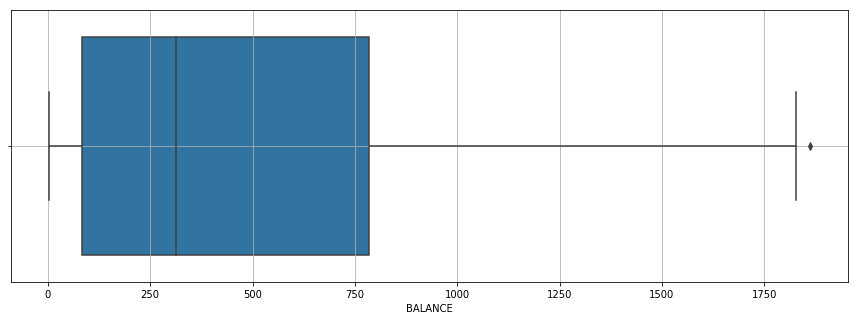

In [145]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

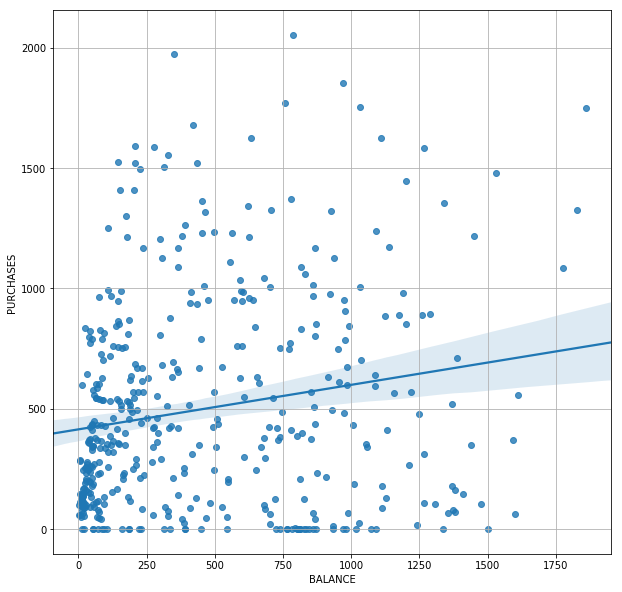

In [146]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

In [147]:
#Cluster 5:

In [148]:
data.iloc[labels_x[5].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,105.0,1038.457276,1122.936929,5.871769,189.119610,680.079404,1418.215497,4719.819043
BALANCE_FREQUENCY,105.0,0.958442,0.085530,0.727273,1.000000,1.000000,1.000000,1.000000
PURCHASES,105.0,577.985429,538.839645,0.000000,117.000000,500.670000,788.140000,2143.730000
ONEOFF_PURCHASES,105.0,354.921810,410.368996,0.000000,0.000000,190.000000,584.340000,1392.830000
INSTALLMENTS_PURCHASES,105.0,223.063619,289.981829,0.000000,0.000000,83.000000,389.240000,1104.790000
CASH_ADVANCE,105.0,298.516795,645.453415,0.000000,0.000000,0.000000,139.117692,2583.510846
PURCHASES_FREQUENCY,105.0,0.443651,0.338599,0.000000,0.083333,0.416667,0.666667,1.000000
ONEOFF_PURCHASES_FREQUENCY,105.0,0.170635,0.176543,0.000000,0.000000,0.083333,0.250000,0.750000
PURCHASES_INSTALLMENTS_FREQUENCY,105.0,0.324603,0.351075,0.000000,0.000000,0.166667,0.583333,1.000000
CASH_ADVANCE_FREQUENCY,105.0,0.054762,0.103896,0.000000,0.000000,0.000000,0.083333,0.500000


In [149]:
cluster=data.iloc[labels_x[5].index,:]

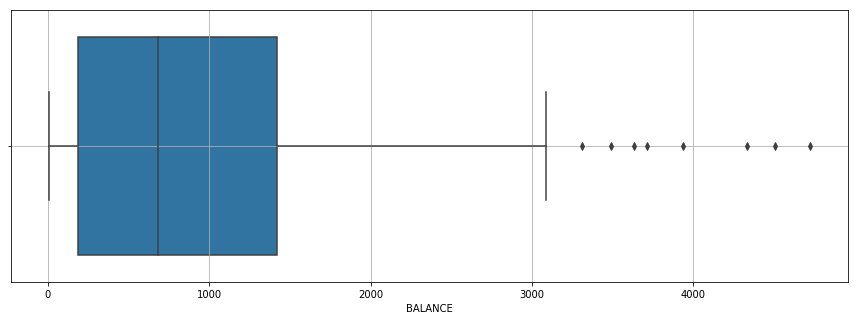

In [150]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

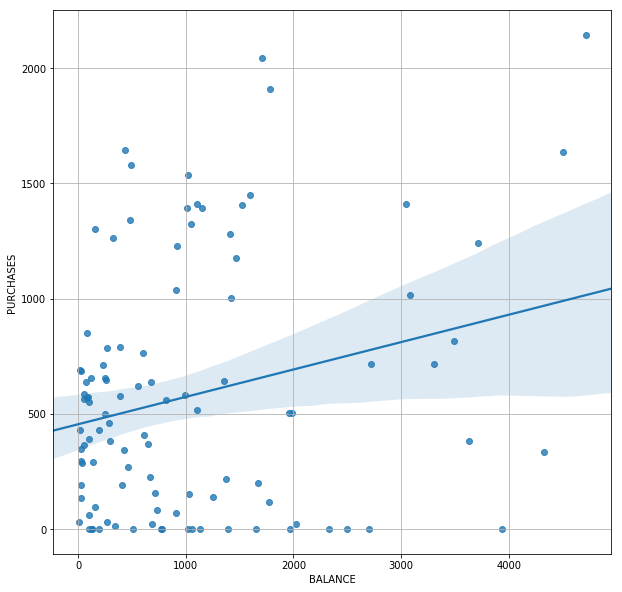

In [151]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

In [152]:
#Cluster 6:

In [153]:
data.iloc[labels_x[6].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,335.0,2207.178863,526.943831,1029.713408,1818.531354,2242.311686,2648.270778,3347.229846
BALANCE_FREQUENCY,335.0,0.994844,0.031430,0.727273,1.000000,1.000000,1.000000,1.000000
PURCHASES,335.0,248.535433,379.507982,0.000000,0.000000,25.260000,395.260000,1814.650000
ONEOFF_PURCHASES,335.0,137.858209,290.572813,0.000000,0.000000,0.000000,122.055000,1425.130000
INSTALLMENTS_PURCHASES,335.0,110.843045,221.944558,0.000000,0.000000,0.000000,119.350000,1066.560000
CASH_ADVANCE,335.0,868.833132,777.057337,0.000000,185.721067,657.525213,1431.812662,2774.385866
PURCHASES_FREQUENCY,335.0,0.250249,0.339667,0.000000,0.000000,0.083333,0.458334,1.000000
ONEOFF_PURCHASES_FREQUENCY,335.0,0.084826,0.163511,0.000000,0.000000,0.000000,0.083333,0.750000
PURCHASES_INSTALLMENTS_FREQUENCY,335.0,0.180099,0.315098,0.000000,0.000000,0.000000,0.250000,1.000000
CASH_ADVANCE_FREQUENCY,335.0,0.171891,0.128136,0.000000,0.083333,0.166667,0.250000,0.500000


In [154]:
cluster=data.iloc[labels_x[6].index,:]

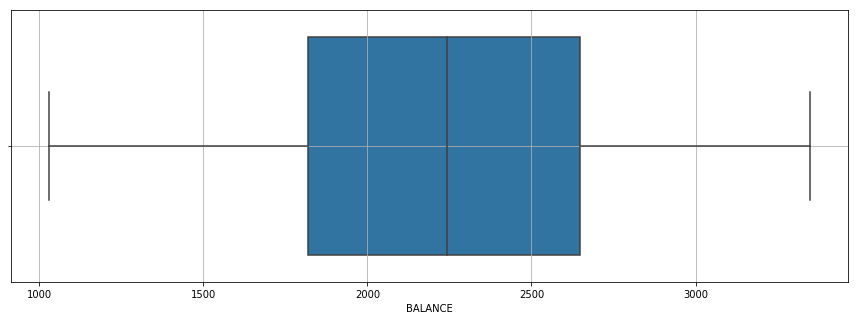

In [155]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

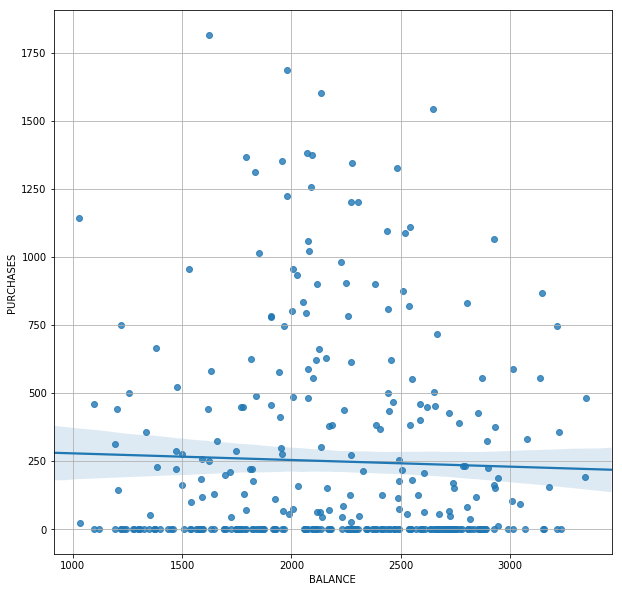

In [156]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

In [ ]:
#Cluster 7:

In [157]:
data.iloc[labels_x[7].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,103.0,1331.625485,696.091329,37.427412,799.404559,1347.883104,1833.390804,3025.373271
BALANCE_FREQUENCY,103.0,0.961165,0.074881,0.727273,0.954546,1.000000,1.000000,1.000000
PURCHASES,103.0,551.066796,640.226423,0.000000,0.000000,302.400000,967.235000,2315.860000
ONEOFF_PURCHASES,103.0,372.651068,467.751496,0.000000,0.000000,76.000000,681.220000,1401.150000
INSTALLMENTS_PURCHASES,103.0,178.415728,284.637439,0.000000,0.000000,0.000000,300.460000,1093.510000
CASH_ADVANCE,103.0,1007.143067,931.248236,0.000000,0.000000,920.309805,1881.696138,2758.007287
PURCHASES_FREQUENCY,103.0,0.360032,0.348162,0.000000,0.000000,0.333333,0.583333,1.000000
ONEOFF_PURCHASES_FREQUENCY,103.0,0.179612,0.212221,0.000000,0.000000,0.083333,0.333333,0.750000
PURCHASES_INSTALLMENTS_FREQUENCY,103.0,0.231392,0.335762,0.000000,0.000000,0.000000,0.416667,1.000000
CASH_ADVANCE_FREQUENCY,103.0,0.148058,0.137046,0.000000,0.000000,0.083333,0.250000,0.500000


In [158]:
cluster=data.iloc[labels_x[7].index,:]

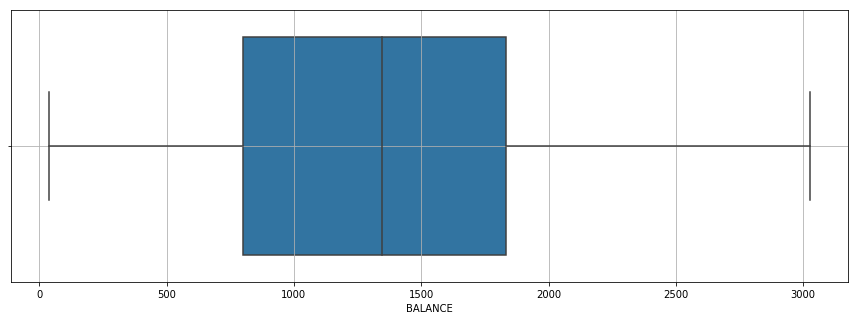

In [159]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

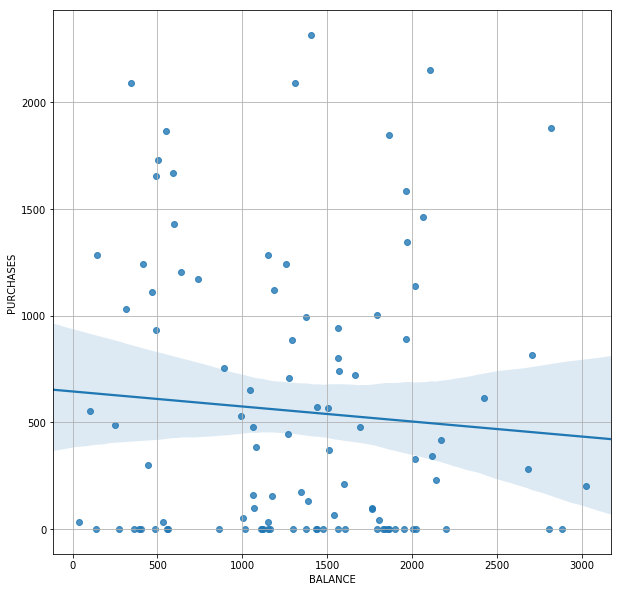

In [160]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

In [161]:
#Cluster 8:

In [162]:
data.iloc[labels_x[8].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,511.0,340.277040,275.074943,3.574463,87.121776,276.213858,536.709271,975.820862
BALANCE_FREQUENCY,511.0,0.967266,0.074851,0.727273,1.000000,1.000000,1.000000,1.000000
PURCHASES,511.0,358.761957,352.039376,0.000000,71.740000,269.900000,540.000000,1857.170000
ONEOFF_PURCHASES,511.0,162.837299,293.854226,0.000000,0.000000,0.000000,208.850000,1440.140000
INSTALLMENTS_PURCHASES,511.0,195.924658,226.718126,0.000000,0.000000,120.000000,323.320000,1125.760000
CASH_ADVANCE,511.0,114.834154,254.002431,0.000000,0.000000,0.000000,63.695243,1366.204137
PURCHASES_FREQUENCY,511.0,0.504403,0.377246,0.000000,0.083333,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,511.0,0.104697,0.167702,0.000000,0.000000,0.000000,0.166667,0.750000
PURCHASES_INSTALLMENTS_FREQUENCY,511.0,0.416667,0.404563,0.000000,0.000000,0.333333,0.916667,1.000000
CASH_ADVANCE_FREQUENCY,511.0,0.052348,0.097305,0.000000,0.000000,0.000000,0.083333,0.500000


In [163]:
cluster=data.iloc[labels_x[8].index,:]

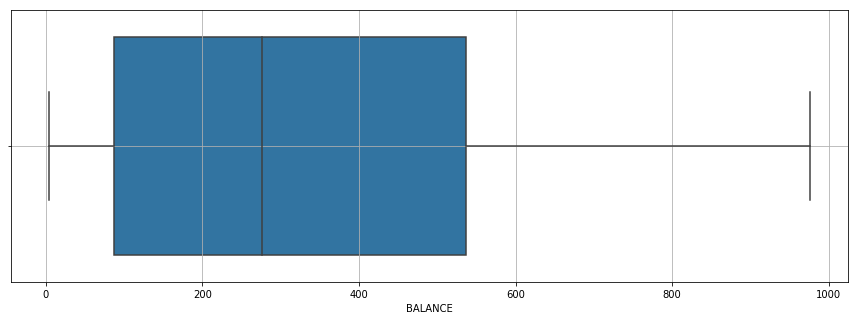

In [164]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

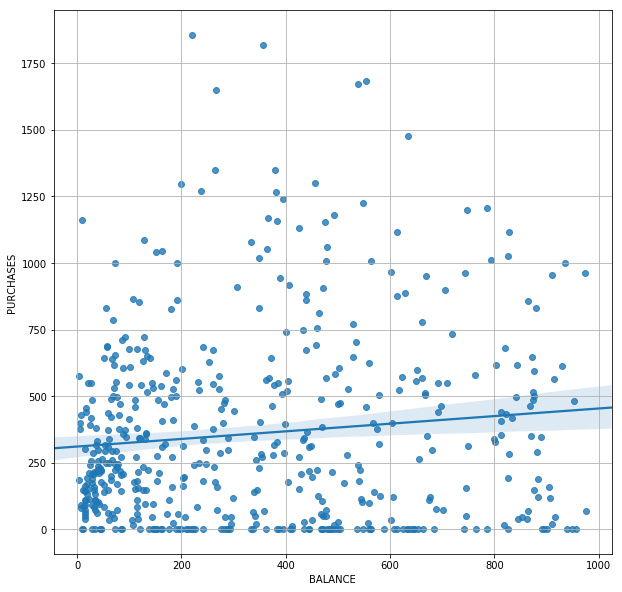

In [165]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()

In [ ]:
#Cluster 9:

In [166]:
data.iloc[labels_x[9].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,218.0,821.969666,356.772441,21.542924,564.910442,813.763286,1076.917727,1969.647597
BALANCE_FREQUENCY,218.0,0.959550,0.077533,0.727273,0.909091,1.000000,1.000000,1.000000
PURCHASES,218.0,282.086055,408.275607,0.000000,0.000000,59.620000,482.702500,2171.860000
ONEOFF_PURCHASES,218.0,134.300275,281.910971,0.000000,0.000000,0.000000,126.750000,1408.820000
INSTALLMENTS_PURCHASES,218.0,147.785780,243.976769,0.000000,0.000000,0.000000,231.595000,1123.580000
CASH_ADVANCE,218.0,1043.858320,692.953773,0.000000,503.340552,1072.453674,1497.950414,2773.394382
PURCHASES_FREQUENCY,218.0,0.275612,0.352756,0.000000,0.000000,0.083333,0.500000,1.000000
ONEOFF_PURCHASES_FREQUENCY,218.0,0.072248,0.139849,0.000000,0.000000,0.000000,0.083333,0.666667
PURCHASES_INSTALLMENTS_FREQUENCY,218.0,0.215596,0.329123,0.000000,0.000000,0.000000,0.416667,1.000000
CASH_ADVANCE_FREQUENCY,218.0,0.191514,0.128456,0.000000,0.083333,0.166667,0.250000,0.500000


In [168]:
cluster=data.iloc[labels_x[9].index,:]

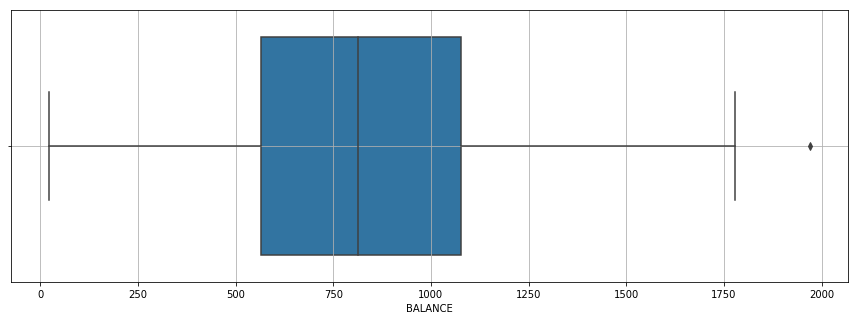

In [169]:
plt.subplots(figsize=(15,5))
sns.boxplot(cluster.BALANCE)
plt.grid()
plt.show()

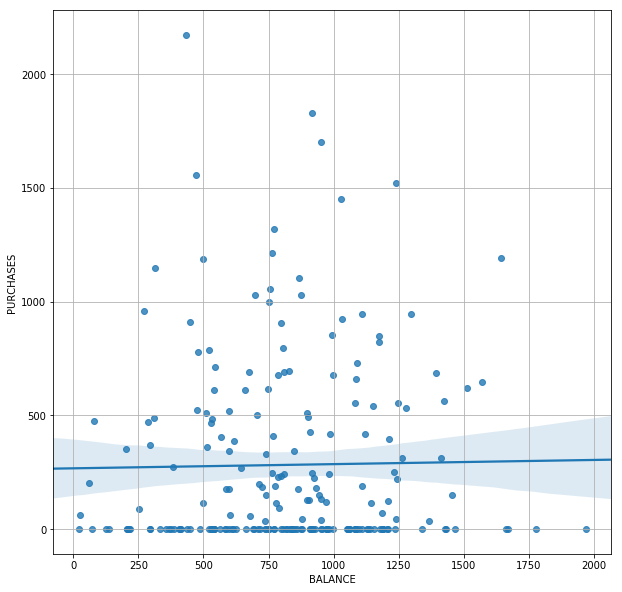

In [170]:
plt.subplots(figsize=(10,10))
sns.regplot(cluster['BALANCE'],cluster['PURCHASES'])
plt.grid()
plt.show()